<a href="https://colab.research.google.com/github/Riddick4-droid/Machine_Learning-Pt/blob/main/MSC_PROJECT_CODES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
##getting the data
import pandas as pd
import numpy as np
from google.colab import userdata
import os
import regex as re
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [ ]:
ms_p_api_key = userdata.get('MATERIALS_PROJECT')
os.environ['MATERIAL_PROJECT_API_KEY'] = ms_p_api_key

In [ ]:
from mp_api.client import MPRester

In [ ]:
from pymatgen.ext.matproj import MPRester
import pandas as pd

API_KEY = "WssZjUJbLNiucH4L1N1BHSB3ZMPDzpl1"

with MPRester(API_KEY) as mpr:
    entries = mpr.summary.search(elements=["U"])
uranium_df = pd.DataFrame(entries)

In [ ]:
display(uranium_df.head())

builder_meta  nsites elements  \
0  {'emmet_version': '0.84.3rc4', 'pymatgen_versi...      30      [U]   
1  {'emmet_version': '0.84.3rc4', 'pymatgen_versi...      30      [U]   
2  {'emmet_version': '0.84.3rc4', 'pymatgen_versi...       6      [U]   
3  {'emmet_version': '0.84.3rc4', 'pymatgen_versi...       3      [U]   
4  {'emmet_version': '0.84.3rc4', 'pymatgen_versi...       4      [U]   

   nelements  composition composition_reduced formula_pretty  \
0          1  {'U': 30.0}          {'U': 1.0}              U   
1          1  {'U': 30.0}          {'U': 1.0}              U   
2          1   {'U': 6.0}          {'U': 1.0}              U   
3          1   {'U': 3.0}          {'U': 1.0}              U   
4          1   {'U': 4.0}          {'U': 1.0}              U   

  formula_anonymous chemsys      volume  ...  \
0                 A       U  576.770100  ...   
1                 A       U  608.672029  ...   
2                 A       U  125.243546  ...   
3                 A       U   56.552425  ...   
4                 A       U   74.358664  ...   

   weighted_surface_energy_EV_PER_ANG2  weighted_surface_energy  \
0                                 None                     None   
1                                 None                     None   
2                                 None                     None   
3                                 None                     None   
4                                 None                     None   

  weighted_work_function surface_anisotropy  shape_factor has_reconstructed  \
0                   None               None          None              None   
1                   None               None          None              None   
2                   None               None          None              None   
3                   None               None          None              None   
4                   None               None          None              None   

  possible_species                                          has_props  \
0            [U0+]  {'materials': True, 'thermo': True, 'xas': Tru...   
1            [U0+]  {'materials': True, 'thermo': True, 'xas': Tru...   
2            [U0+]  {'materials': True, 'thermo': True, 'xas': Tru...   
3            [U0+]  {'materials': True, 'thermo': True, 'xas': Tru...   
4            [U0+]  {'materials': True, 'thermo': True, 'xas': Tru...   

  theoretical                                       database_IDs  
0       False  {'icsd': ['icsd-76041', 'icsd-9140', 'icsd-106...  
1       False  {'icsd': ['icsd-76490', 'icsd-43218', 'icsd-76...  
2       False                           {'icsd': ['icsd-31671']}  
3        True                                                 {}  
4        True                                                 {}  

[5 rows x 69 columns]

In [ ]:
##printing out columns with more than 5% missing values
columns_and_missing_values = {}
total_length_of_data = len(uranium_df)
for col in uranium_df.columns:
    missing_value_count = uranium_df[col].isnull().sum()
    columns_and_missing_values[col] = (missing_value_count,f'{missing_value_count/total_length_of_data*100:.2f}%')

<Figure size 800x600 with 0 Axes>

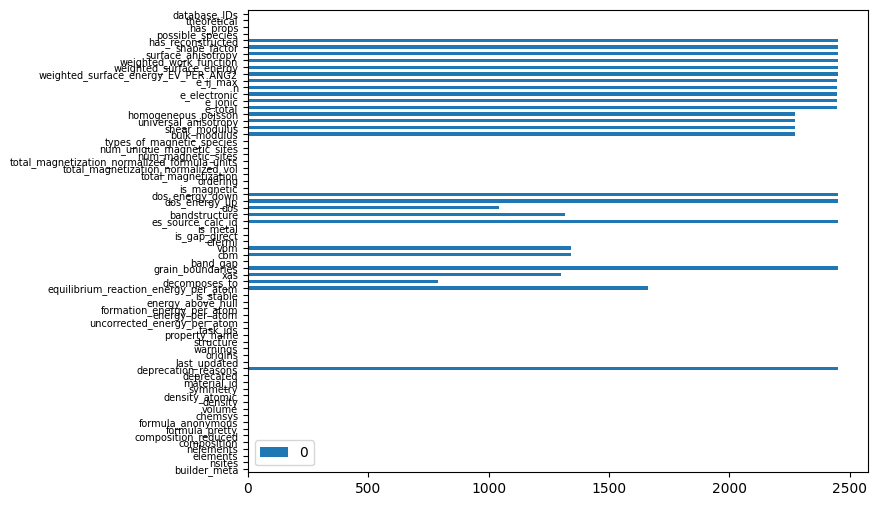

In [166]:
import matplotlib
plt.figure(figsize=(8,6))
pd.DataFrame(columns_and_missing_values,columns=columns_and_missing_values.keys()).T.plot(kind='barh');
plt.tick_params(axis='y',labelsize=7);
plt.yticks(fontsize=7)
plt.show()

In [ ]:
for k,(x,y) in columns_and_missing_values.items():
    val = float(y.strip('%'))
    if val > 5:
        uranium_df = uranium_df.drop(columns=[k],axis=1)

In [ ]:
uranium_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2453 entries, 0 to 2452
Data columns (total 42 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   builder_meta                                  2453 non-null   object 
 1   nsites                                        2453 non-null   int64  
 2   elements                                      2453 non-null   object 
 3   nelements                                     2453 non-null   int64  
 4   composition                                   2453 non-null   object 
 5   composition_reduced                           2453 non-null   object 
 6   formula_pretty                                2453 non-null   object 
 7   formula_anonymous                             2453 non-null   object 
 8   chemsys                                       2453 non-null   object 
 9   volume                                        2453 non-null   f

In [ ]:
##data exploration and visualization

In [ ]:
numeric_columns = uranium_df.select_dtypes(include=np.number).columns.tolist()
numeric_columns

['nsites',
 'nelements',
 'volume',
 'density',
 'density_atomic',
 'uncorrected_energy_per_atom',
 'energy_per_atom',
 'formation_energy_per_atom',
 'energy_above_hull',
 'band_gap',
 'efermi',
 'total_magnetization',
 'total_magnetization_normalized_vol',
 'total_magnetization_normalized_formula_units',
 'num_magnetic_sites',
 'num_unique_magnetic_sites']

In [ ]:
non_numeric_columns = uranium_df.select_dtypes(exclude=np.number).columns.tolist()
non_numeric_columns

['builder_meta',
 'elements',
 'composition',
 'composition_reduced',
 'formula_pretty',
 'formula_anonymous',
 'chemsys',
 'symmetry',
 'material_id',
 'deprecated',
 'last_updated',
 'origins',
 'warnings',
 'structure',
 'property_name',
 'task_ids',
 'is_stable',
 'is_gap_direct',
 'is_metal',
 'is_magnetic',
 'ordering',
 'types_of_magnetic_species',
 'possible_species',
 'has_props',
 'theoretical',
 'database_IDs']



> Add blockquote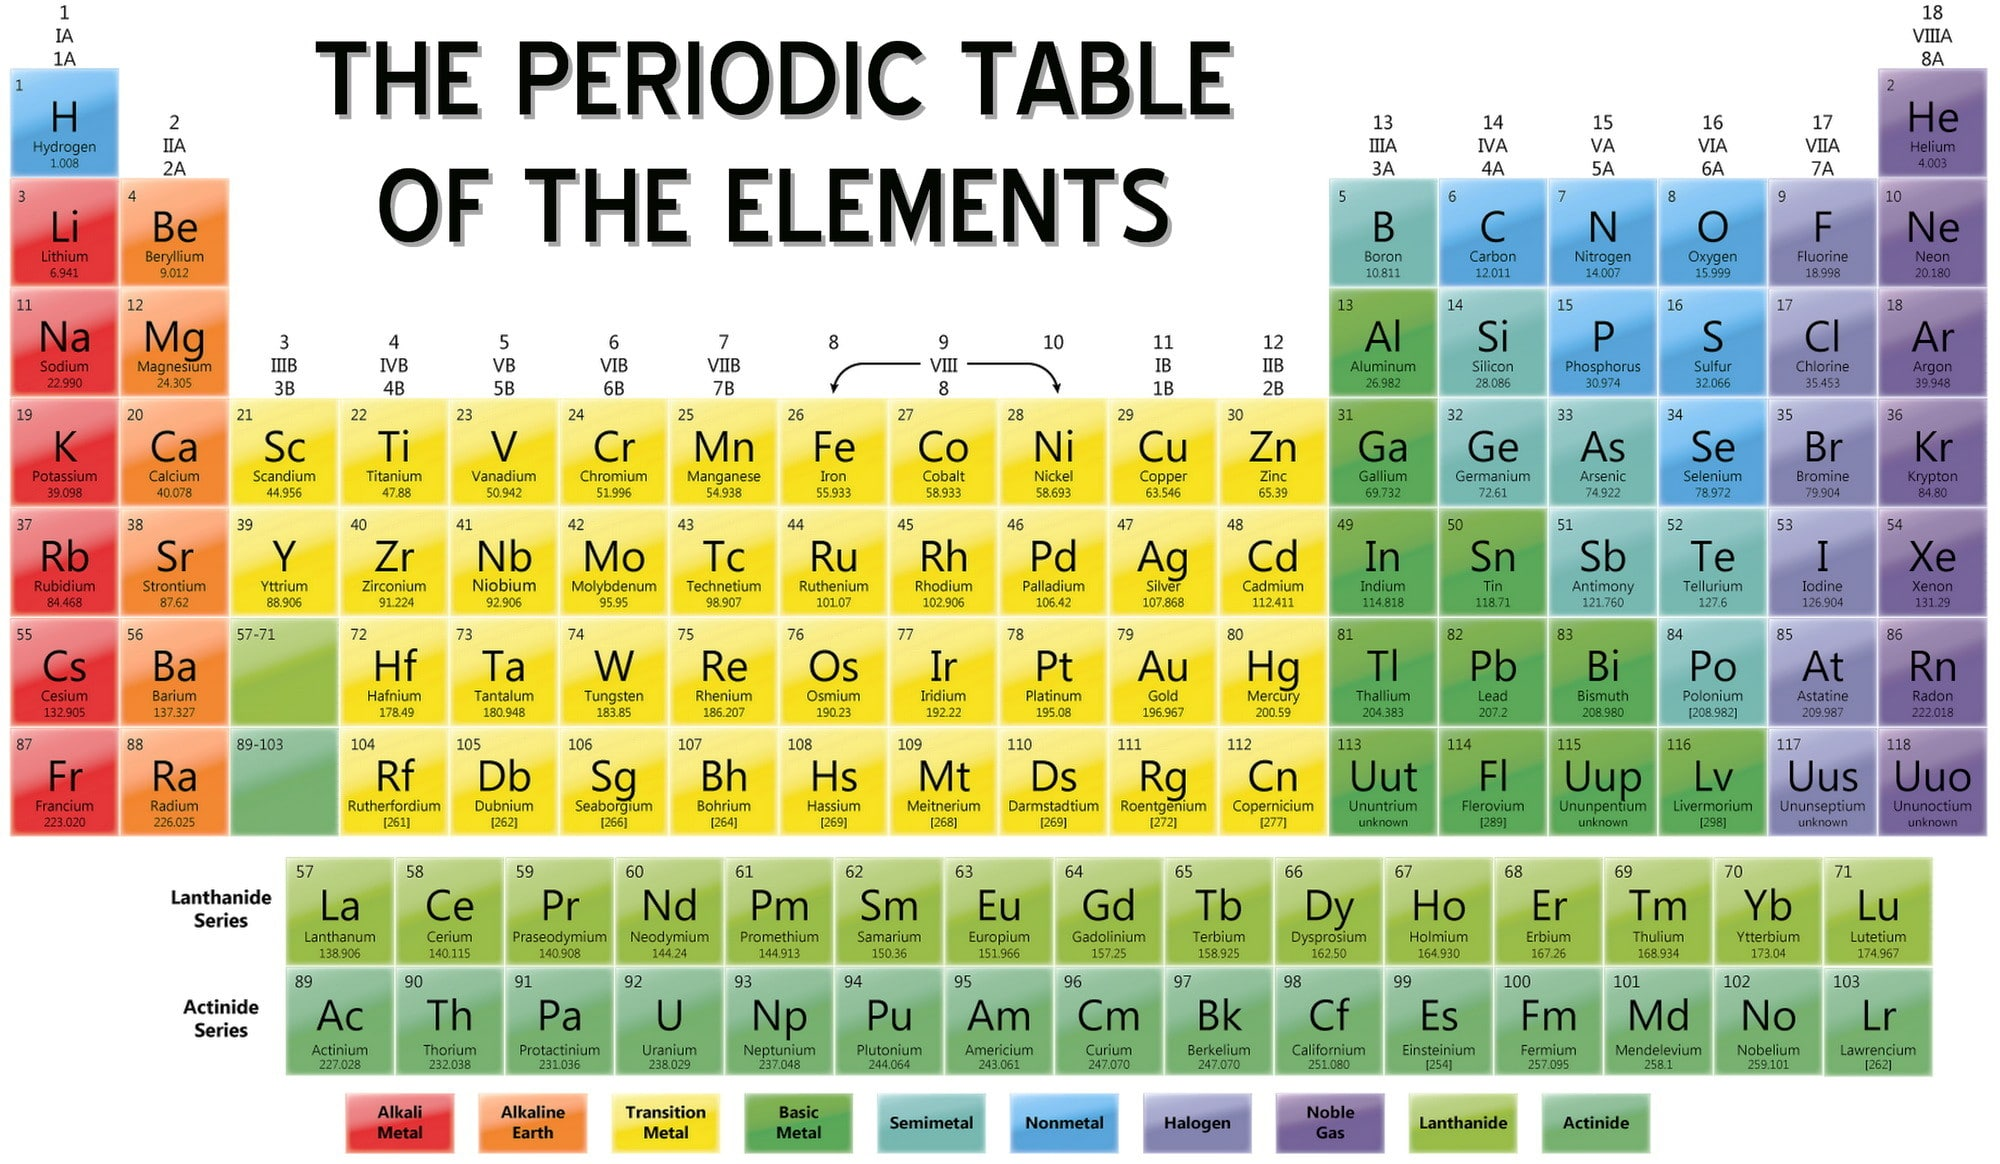



In [ ]:
print(f'shape of the dataset: {uranium_df.shape}')

shape of the dataset: (2453, 42)


In [ ]:
uranium_df.head(5)

builder_meta  nsites elements  \
0  {'emmet_version': '0.84.3rc4', 'pymatgen_versi...      30      [U]   
1  {'emmet_version': '0.84.3rc4', 'pymatgen_versi...      30      [U]   
2  {'emmet_version': '0.84.3rc4', 'pymatgen_versi...       6      [U]   
3  {'emmet_version': '0.84.3rc4', 'pymatgen_versi...       3      [U]   
4  {'emmet_version': '0.84.3rc4', 'pymatgen_versi...       4      [U]   

   nelements  composition composition_reduced formula_pretty  \
0          1  {'U': 30.0}          {'U': 1.0}              U   
1          1  {'U': 30.0}          {'U': 1.0}              U   
2          1   {'U': 6.0}          {'U': 1.0}              U   
3          1   {'U': 3.0}          {'U': 1.0}              U   
4          1   {'U': 4.0}          {'U': 1.0}              U   

  formula_anonymous chemsys      volume  ...  total_magnetization  \
0                 A       U  576.770100  ...         1.034000e-04   
1                 A       U  608.672029  ...         1.478546e+01   
2                 A       U  125.243546  ...         7.900500e-01   
3                 A       U   56.552425  ...         2.244000e-04   
4                 A       U   74.358664  ...         9.000000e-07   

   total_magnetization_normalized_vol  \
0                        1.792742e-07   
1                        2.429134e-02   
2                        6.308109e-03   
3                        3.968000e-06   
4                        1.210350e-08   

  total_magnetization_normalized_formula_units num_magnetic_sites  \
0                                 3.446667e-06                0.0   
1                                 4.928487e-01               20.0   
2                                 1.316750e-01                0.0   
3                                 7.480000e-05                0.0   
4                                 2.250000e-07                0.0   

   num_unique_magnetic_sites types_of_magnetic_species possible_species  \
0                        0.0                        []            [U0+]   
1                        5.0                       [U]            [U0+]   
2                        0.0                        []            [U0+]   
3                        0.0                        []            [U0+]   
4                        0.0                        []            [U0+]   

                                           has_props theoretical  \
0  {'materials': True, 'thermo': True, 'xas': Tru...       False   
1  {'materials': True, 'thermo': True, 'xas': Tru...       False   
2  {'materials': True, 'thermo': True, 'xas': Tru...       False   
3  {'materials': True, 'thermo': True, 'xas': Tru...        True   
4  {'materials': True, 'thermo': True, 'xas': Tru...        True   

                                        database_IDs  
0  {'icsd': ['icsd-76041', 'icsd-9140', 'icsd-106...  
1  {'icsd': ['icsd-76490', 'icsd-43218', 'icsd-76...  
2                           {'icsd': ['icsd-31671']}  
3                                                 {}  
4                                                 {}  

[5 rows x 42 columns]

In [ ]:
a_df = uranium_df.copy(deep=True)

In [ ]:
a_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2453 entries, 0 to 2452
Data columns (total 42 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   builder_meta                                  2453 non-null   object 
 1   nsites                                        2453 non-null   int64  
 2   elements                                      2453 non-null   object 
 3   nelements                                     2453 non-null   int64  
 4   composition                                   2453 non-null   object 
 5   composition_reduced                           2453 non-null   object 
 6   formula_pretty                                2453 non-null   object 
 7   formula_anonymous                             2453 non-null   object 
 8   chemsys                                       2453 non-null   object 
 9   volume                                        2453 non-null   f

# feature engineering

In [ ]:
boolean_columns = a_df.select_dtypes(include=bool).columns.tolist()
for col in boolean_columns:
    a_df[col] = a_df[col].astype('category').cat.codes

In [ ]:
boolean_columns

['deprecated',
 'is_stable',
 'is_gap_direct',
 'is_metal',
 'is_magnetic',
 'theoretical']

In [ ]:
a_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2453 entries, 0 to 2452
Data columns (total 42 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   builder_meta                                  2453 non-null   object 
 1   nsites                                        2453 non-null   int64  
 2   elements                                      2453 non-null   object 
 3   nelements                                     2453 non-null   int64  
 4   composition                                   2453 non-null   object 
 5   composition_reduced                           2453 non-null   object 
 6   formula_pretty                                2453 non-null   object 
 7   formula_anonymous                             2453 non-null   object 
 8   chemsys                                       2453 non-null   object 
 9   volume                                        2453 non-null   f

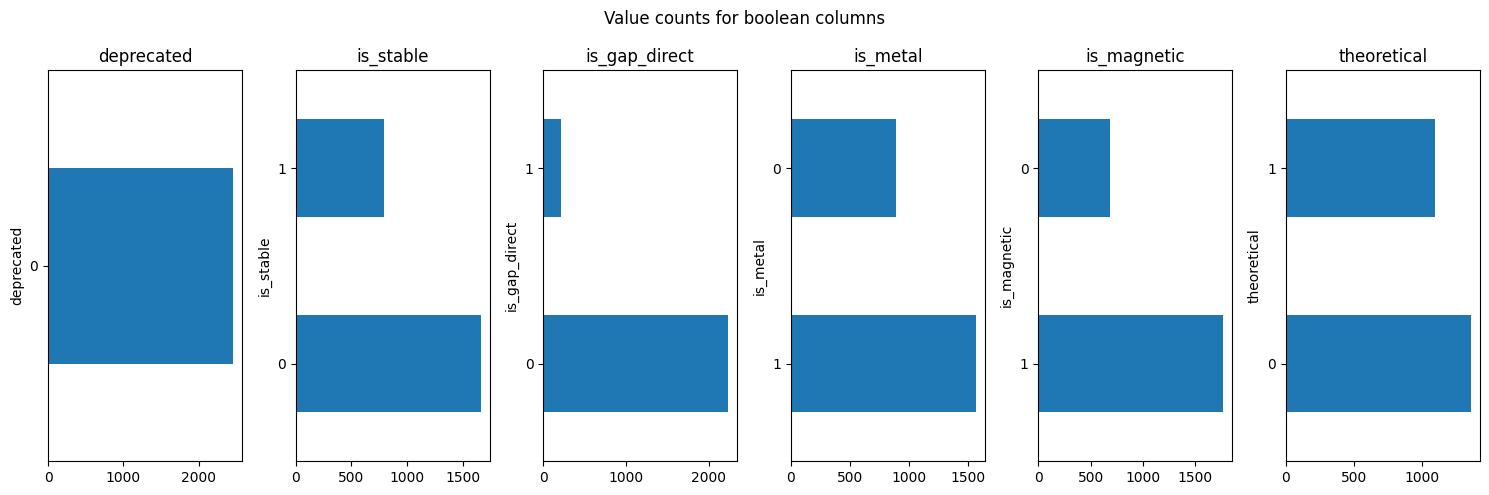

In [ ]:
plt.figure(figsize=(15,5))

for i, col in enumerate(boolean_columns):
    plt.suptitle('Value counts for boolean columns')
    plt.subplot(1,len(boolean_columns),i+1)
    a_df[col].value_counts().plot(kind='barh',sharex=True)
    plt.title(f'{col}')
plt.tight_layout()
plt.show()

In [ ]:
len(numeric_columns)

16

/tmp/ipython-input-1139320604.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a_df[col])
/tmp/ipython-input-1139320604.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a_df[col])
/tmp/ipython-input-1139320604.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in 

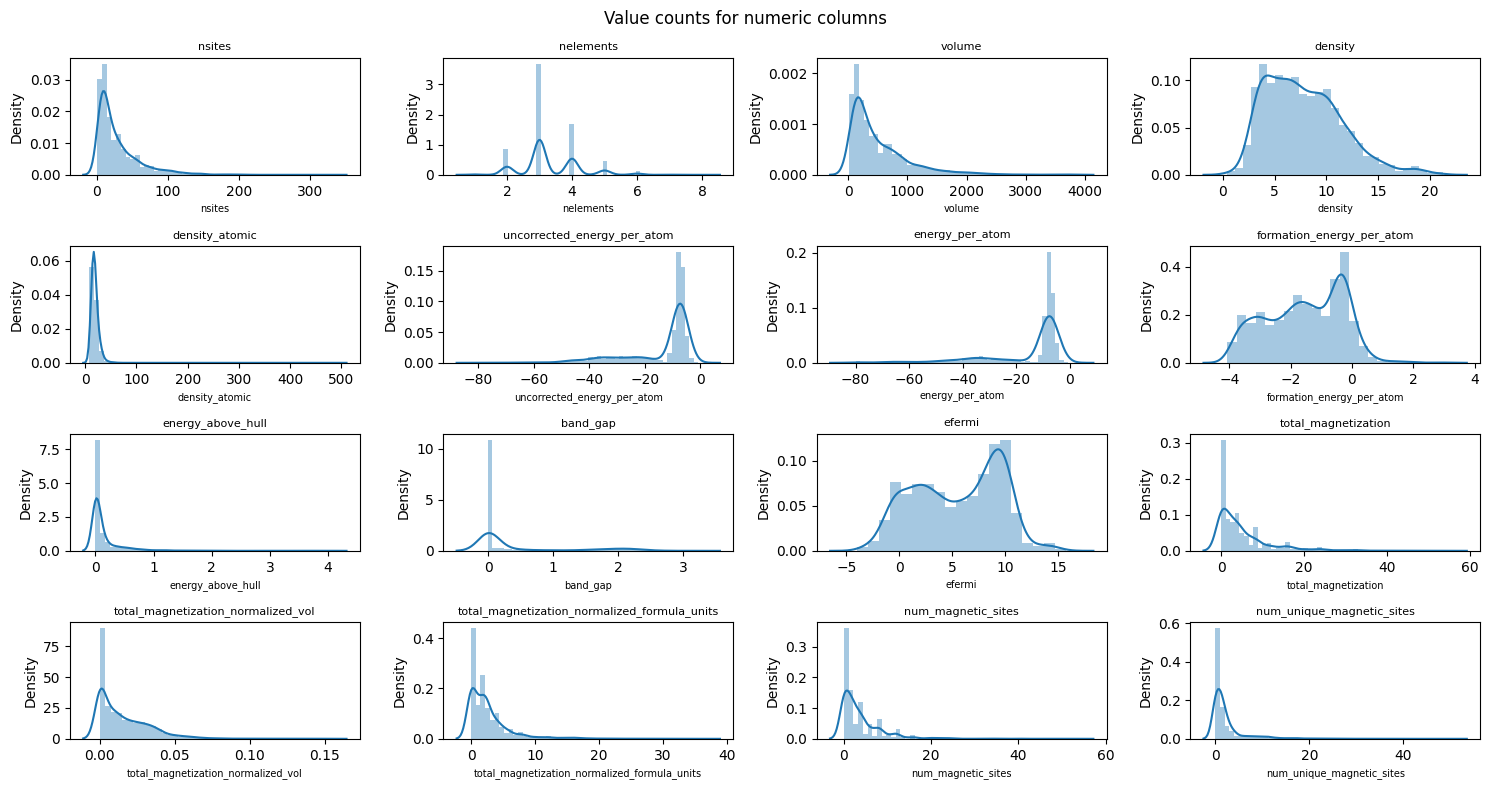

In [ ]:
##for the numreric columns
plt.figure(figsize=(15,8))

for i, col in enumerate(numeric_columns):
    plt.suptitle('Value counts for numeric columns')
    plt.subplot(4,4,i+1)
    sns.distplot(a_df[col])
    plt.title(f'{col}',fontsize=8)
    plt.xlabel(f'{col}',fontsize=7)
plt.tight_layout()
plt.show()

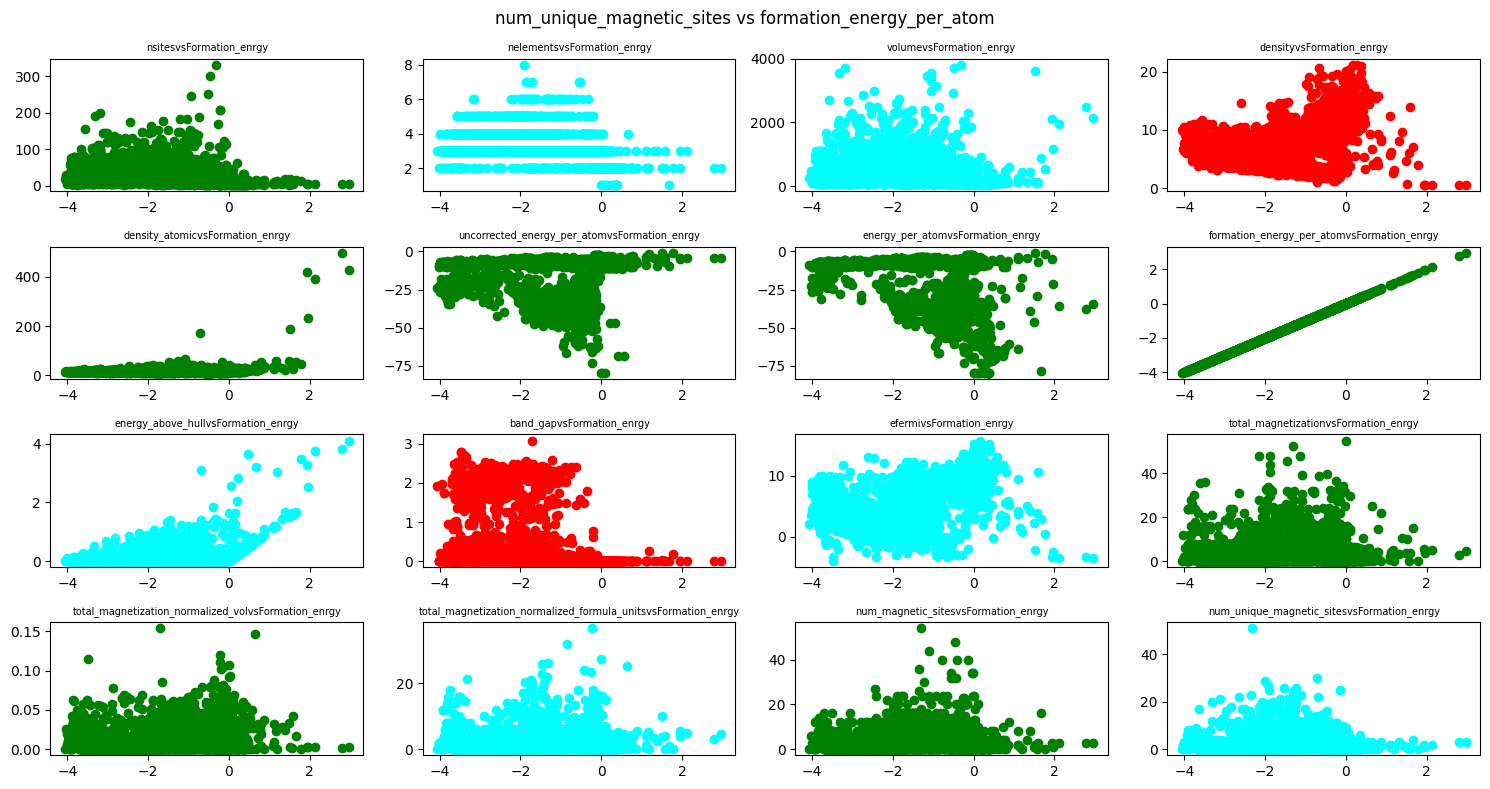

In [ ]:
##lets see how each of these numeric features indiviually relates to the formation energy
plt.figure(figsize=(15,8))
colors = ['red','green','cyan']
for i,col in enumerate(numeric_columns):
    plt.suptitle(f'{col} vs formation_energy_per_atom')
    plt.subplot(4,4,i+1)
    plt.scatter(x=a_df['formation_energy_per_atom'],y=a_df[col],c=random.choice(colors))
    plt.title(f'{col}vsFormation_enrgy',fontsize=7)
plt.tight_layout()
plt.show()

In [ ]:
##for the non_numeric features
non_numeric_columns

['builder_meta',
 'elements',
 'composition',
 'composition_reduced',
 'formula_pretty',
 'formula_anonymous',
 'chemsys',
 'symmetry',
 'material_id',
 'deprecated',
 'last_updated',
 'origins',
 'warnings',
 'structure',
 'property_name',
 'task_ids',
 'is_stable',
 'is_gap_direct',
 'is_metal',
 'is_magnetic',
 'ordering',
 'types_of_magnetic_species',
 'possible_species',
 'has_props',
 'theoretical',
 'database_IDs']

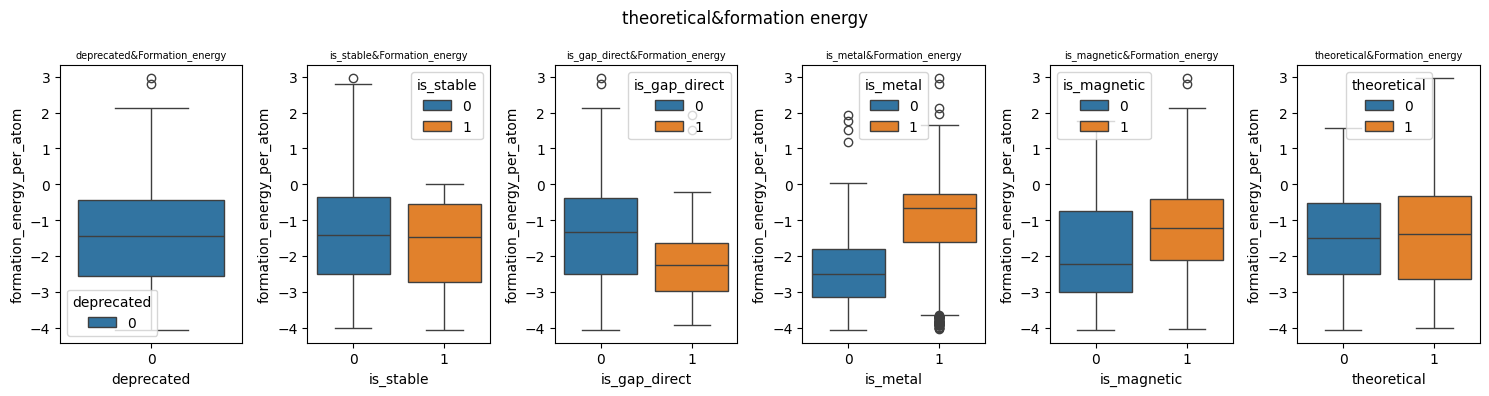

In [ ]:
##boolean cols vs formation_energy
import matplotlib
matplotlib.rcParams['figure.figsize']=(15,4)
for i, col in enumerate(boolean_columns):
    plt.suptitle(f'{col}&formation energy')
    plt.subplot(1,len(boolean_columns),i+1)
    sns.boxplot(x=a_df[col],y=a_df['formation_energy_per_atom'],hue=a_df[col])
    plt.title(f'{col}&Formation_energy',fontsize=7)
plt.tight_layout()
plt.show()

In [ ]:
##it is imperative to drop is_metal as this is only one value populated
#columns like deprecated are only a single vvalue hence would cause a bias in the analysis
a_df = a_df.drop(['deprecated'],axis=1)

In [ ]:
a_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2453 entries, 0 to 2452
Data columns (total 41 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   builder_meta                                  2453 non-null   object 
 1   nsites                                        2453 non-null   int64  
 2   elements                                      2453 non-null   object 
 3   nelements                                     2453 non-null   int64  
 4   composition                                   2453 non-null   object 
 5   composition_reduced                           2453 non-null   object 
 6   formula_pretty                                2453 non-null   object 
 7   formula_anonymous                             2453 non-null   object 
 8   chemsys                                       2453 non-null   object 
 9   volume                                        2453 non-null   f

In [ ]:
a_df.head()

builder_meta  nsites elements  \
0  {'emmet_version': '0.84.3rc4', 'pymatgen_versi...      30      [U]   
1  {'emmet_version': '0.84.3rc4', 'pymatgen_versi...      30      [U]   
2  {'emmet_version': '0.84.3rc4', 'pymatgen_versi...       6      [U]   
3  {'emmet_version': '0.84.3rc4', 'pymatgen_versi...       3      [U]   
4  {'emmet_version': '0.84.3rc4', 'pymatgen_versi...       4      [U]   

   nelements  composition composition_reduced formula_pretty  \
0          1  {'U': 30.0}          {'U': 1.0}              U   
1          1  {'U': 30.0}          {'U': 1.0}              U   
2          1   {'U': 6.0}          {'U': 1.0}              U   
3          1   {'U': 3.0}          {'U': 1.0}              U   
4          1   {'U': 4.0}          {'U': 1.0}              U   

  formula_anonymous chemsys      volume  ...  total_magnetization  \
0                 A       U  576.770100  ...         1.034000e-04   
1                 A       U  608.672029  ...         1.478546e+01   
2                 A       U  125.243546  ...         7.900500e-01   
3                 A       U   56.552425  ...         2.244000e-04   
4                 A       U   74.358664  ...         9.000000e-07   

   total_magnetization_normalized_vol  \
0                        1.792742e-07   
1                        2.429134e-02   
2                        6.308109e-03   
3                        3.968000e-06   
4                        1.210350e-08   

  total_magnetization_normalized_formula_units num_magnetic_sites  \
0                                 3.446667e-06                0.0   
1                                 4.928487e-01               20.0   
2                                 1.316750e-01                0.0   
3                                 7.480000e-05                0.0   
4                                 2.250000e-07                0.0   

  num_unique_magnetic_sites types_of_magnetic_species possible_species  \
0                       0.0                        []            [U0+]   
1                       5.0                       [U]            [U0+]   
2                       0.0                        []            [U0+]   
3                       0.0                        []            [U0+]   
4                       0.0                        []            [U0+]   

                                           has_props theoretical  \
0  {'materials': True, 'thermo': True, 'xas': Tru...           0   
1  {'materials': True, 'thermo': True, 'xas': Tru...           0   
2  {'materials': True, 'thermo': True, 'xas': Tru...           0   
3  {'materials': True, 'thermo': True, 'xas': Tru...           1   
4  {'materials': True, 'thermo': True, 'xas': Tru...           1   

                                        database_IDs  
0  {'icsd': ['icsd-76041', 'icsd-9140', 'icsd-106...  
1  {'icsd': ['icsd-76490', 'icsd-43218', 'icsd-76...  
2                           {'icsd': ['icsd-31671']}  
3                                                 {}  
4                                                 {}  

[5 rows x 41 columns]

In [ ]:
a_df.columns

Index(['builder_meta', 'nsites', 'elements', 'nelements', 'composition',
       'composition_reduced', 'formula_pretty', 'formula_anonymous', 'chemsys',
       'volume', 'density', 'density_atomic', 'symmetry', 'material_id',
       'last_updated', 'origins', 'warnings', 'structure', 'property_name',
       'task_ids', 'uncorrected_energy_per_atom', 'energy_per_atom',
       'formation_energy_per_atom', 'energy_above_hull', 'is_stable',
       'band_gap', 'efermi', 'is_gap_direct', 'is_metal', 'is_magnetic',
       'ordering', 'total_magnetization', 'total_magnetization_normalized_vol',
       'total_magnetization_normalized_formula_units', 'num_magnetic_sites',
       'num_unique_magnetic_sites', 'types_of_magnetic_species',
       'possible_species', 'has_props', 'theoretical', 'database_IDs'],
      dtype='object')

In [ ]:
a_df = a_df.drop(['builder_meta','last_updated','material_id','database_IDs','task_ids','warnings'],axis=1)

In [ ]:
a_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2453 entries, 0 to 2452
Data columns (total 35 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   nsites                                        2453 non-null   int64  
 1   elements                                      2453 non-null   object 
 2   nelements                                     2453 non-null   int64  
 3   composition                                   2453 non-null   object 
 4   composition_reduced                           2453 non-null   object 
 5   formula_pretty                                2453 non-null   object 
 6   formula_anonymous                             2453 non-null   object 
 7   chemsys                                       2453 non-null   object 
 8   volume                                        2453 non-null   float64
 9   density                                       2453 non-null   f

In [ ]:
a_df = a_df.drop(['origins'],axis=1)

In [ ]:
a_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2453 entries, 0 to 2452
Data columns (total 34 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   nsites                                        2453 non-null   int64  
 1   elements                                      2453 non-null   object 
 2   nelements                                     2453 non-null   int64  
 3   composition                                   2453 non-null   object 
 4   composition_reduced                           2453 non-null   object 
 5   formula_pretty                                2453 non-null   object 
 6   formula_anonymous                             2453 non-null   object 
 7   chemsys                                       2453 non-null   object 
 8   volume                                        2453 non-null   float64
 9   density                                       2453 non-null   f

In [ ]:
a_df.head()

nsites elements  nelements  composition composition_reduced formula_pretty  \
0      30      [U]          1  {'U': 30.0}          {'U': 1.0}              U   
1      30      [U]          1  {'U': 30.0}          {'U': 1.0}              U   
2       6      [U]          1   {'U': 6.0}          {'U': 1.0}              U   
3       3      [U]          1   {'U': 3.0}          {'U': 1.0}              U   
4       4      [U]          1   {'U': 4.0}          {'U': 1.0}              U   

  formula_anonymous chemsys      volume    density  ...  ordering  \
0                 A       U  576.770100  20.558779  ...        NM   
1                 A       U  608.672029  19.481245  ...        FM   
2                 A       U  125.243546  18.935409  ...        NM   
3                 A       U   56.552425  20.967605  ...        NM   
4                 A       U   74.358664  21.262152  ...        NM   

  total_magnetization total_magnetization_normalized_vol  \
0        1.034000e-04                       1.792742e-07   
1        1.478546e+01                       2.429134e-02   
2        7.900500e-01                       6.308109e-03   
3        2.244000e-04                       3.968000e-06   
4        9.000000e-07                       1.210350e-08   

  total_magnetization_normalized_formula_units  num_magnetic_sites  \
0                                 3.446667e-06                 0.0   
1                                 4.928487e-01                20.0   
2                                 1.316750e-01                 0.0   
3                                 7.480000e-05                 0.0   
4                                 2.250000e-07                 0.0   

   num_unique_magnetic_sites  types_of_magnetic_species  possible_species  \
0                        0.0                         []             [U0+]   
1                        5.0                        [U]             [U0+]   
2                        0.0                         []             [U0+]   
3                        0.0                         []             [U0+]   
4                        0.0                         []             [U0+]   

                                           has_props  theoretical  
0  {'materials': True, 'thermo': True, 'xas': Tru...            0  
1  {'materials': True, 'thermo': True, 'xas': Tru...            0  
2  {'materials': True, 'thermo': True, 'xas': Tru...            0  
3  {'materials': True, 'thermo': True, 'xas': Tru...            1  
4  {'materials': True, 'thermo': True, 'xas': Tru...            1  

[5 rows x 34 columns]

In [ ]:
a_df = a_df.drop(['elements','nelements','composition','composition_reduced','formula_anonymous','chemsys'],axis=1)

In [ ]:
a_df.head()

nsites formula_pretty      volume    density  density_atomic  \
0      30              U  576.770100  20.558779       19.225670   
1      30              U  608.672029  19.481245       20.289068   
2       6              U  125.243546  18.935409       20.873924   
3       3              U   56.552425  20.967605       18.850808   
4       4              U   74.358664  21.262152       18.589666   

                                            symmetry  \
0  {'crystal_system': 'Tetragonal', 'symbol': 'P4...   
1  {'crystal_system': 'Tetragonal', 'symbol': 'P4...   
2  {'crystal_system': 'Monoclinic', 'symbol': 'C2...   
3  {'crystal_system': 'Hexagonal', 'symbol': 'P6/...   
4  {'crystal_system': 'Cubic', 'symbol': 'Pm-3m',...   

                                           structure property_name  \
0  [[4.09481589 0.         0.        ] U, [1.2991...       summary   
1  [[2.79182497 0.         0.        ] U, [0.    ...       summary   
2  [[-2.28806802  5.07405925  1.0565415 ] U, [2.2...       summary   
3  [[2.55280304 1.40066186 0.        ] U, [0.1294...       summary   
4  [[-1.34043691  1.32402235  2.64279991] U, [1.3...       summary   

   uncorrected_energy_per_atom  energy_per_atom  ...  ordering  \
0                   -11.201739       -79.852365  ...        NM   
1                   -79.844526       -79.844526  ...        FM   
2                   -11.009970       -79.660596  ...        NM   
3                   -10.906159       -79.556785  ...        NM   
4                   -11.124947       -79.775573  ...        NM   

   total_magnetization  total_magnetization_normalized_vol  \
0         1.034000e-04                        1.792742e-07   
1         1.478546e+01                        2.429134e-02   
2         7.900500e-01                        6.308109e-03   
3         2.244000e-04                        3.968000e-06   
4         9.000000e-07                        1.210350e-08   

   total_magnetization_normalized_formula_units  num_magnetic_sites  \
0                                  3.446667e-06                 0.0   
1                                  4.928487e-01                20.0   
2                                  1.316750e-01                 0.0   
3                                  7.480000e-05                 0.0   
4                                  2.250000e-07                 0.0   

   num_unique_magnetic_sites  types_of_magnetic_species  possible_species  \
0                        0.0                         []             [U0+]   
1                        5.0                        [U]             [U0+]   
2                        0.0                         []             [U0+]   
3                        0.0                         []             [U0+]   
4                        0.0                         []             [U0+]   

                                           has_props  theoretical  
0  {'materials': True, 'thermo': True, 'xas': Tru...            0  
1  {'materials': True, 'thermo': True, 'xas': Tru...            0  
2  {'materials': True, 'thermo': True, 'xas': Tru...            0  
3  {'materials': True, 'thermo': True, 'xas': Tru...            1  
4  {'materials': True, 'thermo': True, 'xas': Tru...            1  

[5 rows x 28 columns]

In [ ]:
a_df['ordering'].value_counts()

ordering
FM         1421
NM          684
FiM         336
AFM           9
Unknown       3
Name: count, dtype: int64

In [ ]:
##viewing symmetry
a_df['symmetry'].value_counts()

symmetry
{'crystal_system': 'Monoclinic', 'symbol': 'P2_1/c', 'hall': None, 'number': 14, 'point_group': '2/m', 'symprec': 0.1, 'angle_tolerance': 5.0, 'version': '2.5.0'}       245
{'crystal_system': 'Triclinic', 'symbol': 'P-1', 'hall': None, 'number': 2, 'point_group': '-1', 'symprec': 0.1, 'angle_tolerance': 5.0, 'version': '2.5.0'}             154
{'crystal_system': 'Orthorhombic', 'symbol': 'Pnma', 'hall': None, 'number': 62, 'point_group': 'mmm', 'symprec': 0.1, 'angle_tolerance': 5.0, 'version': '2.5.0'}       150
{'crystal_system': 'Tetragonal', 'symbol': 'I4/mmm', 'hall': None, 'number': 139, 'point_group': '4/mmm', 'symprec': 0.1, 'angle_tolerance': 5.0, 'version': '2.5.0'}    113
{'crystal_system': 'Monoclinic', 'symbol': 'C2/m', 'hall': None, 'number': 12, 'point_group': '2/m', 'symprec': 0.1, 'angle_tolerance': 5.0, 'version': '2.5.0'}          84
                                                                                                                                                                        ... 
{'crystal_system': 'Tetragonal', 'symbol': 'I4_1md', 'hall': None, 'number': 109, 'point_group': '4mm', 'symprec': 0.1, 'angle_tolerance': 5.0, 'version': '2.5.0'}        1
{'crystal_system': 'Orthorhombic', 'symbol': 'Cmme', 'hall': None, 'number': 67, 'point_group': 'mmm', 'symprec': 0.1, 'angle_tolerance': 5.0, 'version': '2.5.0'}         1
{'crystal_system': 'Orthorhombic', 'symbol': 'C222_1', 'hall': None, 'number': 20, 'point_group': '222', 'symprec': 0.1, 'angle_tolerance': 5.0, 'version': '2.5.0'}       1
{'crystal_system': 'Tetragonal', 'symbol': 'P-42_1m', 'hall': None, 'number': 113, 'point_group': '-42m', 'symprec': 0.1, 'angle_tolerance': 5.0, 'version': '2.5.0'}      1
{'crystal_system': 'Orthorhombic', 'symbol': 'I222', 'hall': None, 'number': 23, 'point_group': '222', 'symprec': 0.1, 'angle_tolerance': 5.0, 'version': '2.5.0'}         1
Name: count, Length: 154, dtype: int64

In [ ]:
##experimenting with data where symmetry is a feature
a_df_copy = a_df.copy(deep=True)

In [ ]:
a_df_copy.head()

nsites formula_pretty      volume    density  density_atomic  \
0      30              U  576.770100  20.558779       19.225670   
1      30              U  608.672029  19.481245       20.289068   
2       6              U  125.243546  18.935409       20.873924   
3       3              U   56.552425  20.967605       18.850808   
4       4              U   74.358664  21.262152       18.589666   

                                            symmetry  \
0  {'crystal_system': 'Tetragonal', 'symbol': 'P4...   
1  {'crystal_system': 'Tetragonal', 'symbol': 'P4...   
2  {'crystal_system': 'Monoclinic', 'symbol': 'C2...   
3  {'crystal_system': 'Hexagonal', 'symbol': 'P6/...   
4  {'crystal_system': 'Cubic', 'symbol': 'Pm-3m',...   

                                           structure property_name  \
0  [[4.09481589 0.         0.        ] U, [1.2991...       summary   
1  [[2.79182497 0.         0.        ] U, [0.    ...       summary   
2  [[-2.28806802  5.07405925  1.0565415 ] U, [2.2...       summary   
3  [[2.55280304 1.40066186 0.        ] U, [0.1294...       summary   
4  [[-1.34043691  1.32402235  2.64279991] U, [1.3...       summary   

   uncorrected_energy_per_atom  energy_per_atom  ...  ordering  \
0                   -11.201739       -79.852365  ...        NM   
1                   -79.844526       -79.844526  ...        FM   
2                   -11.009970       -79.660596  ...        NM   
3                   -10.906159       -79.556785  ...        NM   
4                   -11.124947       -79.775573  ...        NM   

   total_magnetization  total_magnetization_normalized_vol  \
0         1.034000e-04                        1.792742e-07   
1         1.478546e+01                        2.429134e-02   
2         7.900500e-01                        6.308109e-03   
3         2.244000e-04                        3.968000e-06   
4         9.000000e-07                        1.210350e-08   

   total_magnetization_normalized_formula_units  num_magnetic_sites  \
0                                  3.446667e-06                 0.0   
1                                  4.928487e-01                20.0   
2                                  1.316750e-01                 0.0   
3                                  7.480000e-05                 0.0   
4                                  2.250000e-07                 0.0   

   num_unique_magnetic_sites  types_of_magnetic_species  possible_species  \
0                        0.0                         []             [U0+]   
1                        5.0                        [U]             [U0+]   
2                        0.0                         []             [U0+]   
3                        0.0                         []             [U0+]   
4                        0.0                         []             [U0+]   

                                           has_props  theoretical  
0  {'materials': True, 'thermo': True, 'xas': Tru...            0  
1  {'materials': True, 'thermo': True, 'xas': Tru...            0  
2  {'materials': True, 'thermo': True, 'xas': Tru...            0  
3  {'materials': True, 'thermo': True, 'xas': Tru...            1  
4  {'materials': True, 'thermo': True, 'xas': Tru...            1  

[5 rows x 28 columns]

In [ ]:
a_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2453 entries, 0 to 2452
Data columns (total 28 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   nsites                                        2453 non-null   int64  
 1   formula_pretty                                2453 non-null   object 
 2   volume                                        2453 non-null   float64
 3   density                                       2453 non-null   float64
 4   density_atomic                                2453 non-null   float64
 5   symmetry                                      2453 non-null   object 
 6   structure                                     2453 non-null   object 
 7   property_name                                 2453 non-null   object 
 8   uncorrected_energy_per_atom                   2453 non-null   float64
 9   energy_per_atom                               2453 non-null   f

In [ ]:
a_df_copy = a_df_copy.drop('types_of_magnetic_species',axis=1)

In [ ]:
a_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2453 entries, 0 to 2452
Data columns (total 27 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   nsites                                        2453 non-null   int64  
 1   formula_pretty                                2453 non-null   object 
 2   volume                                        2453 non-null   float64
 3   density                                       2453 non-null   float64
 4   density_atomic                                2453 non-null   float64
 5   symmetry                                      2453 non-null   object 
 6   structure                                     2453 non-null   object 
 7   property_name                                 2453 non-null   object 
 8   uncorrected_energy_per_atom                   2453 non-null   float64
 9   energy_per_atom                               2453 non-null   f

In [ ]:
a_df_copy.head()

nsites formula_pretty      volume    density  density_atomic  \
0      30              U  576.770100  20.558779       19.225670   
1      30              U  608.672029  19.481245       20.289068   
2       6              U  125.243546  18.935409       20.873924   
3       3              U   56.552425  20.967605       18.850808   
4       4              U   74.358664  21.262152       18.589666   

                                            symmetry  \
0  {'crystal_system': 'Tetragonal', 'symbol': 'P4...   
1  {'crystal_system': 'Tetragonal', 'symbol': 'P4...   
2  {'crystal_system': 'Monoclinic', 'symbol': 'C2...   
3  {'crystal_system': 'Hexagonal', 'symbol': 'P6/...   
4  {'crystal_system': 'Cubic', 'symbol': 'Pm-3m',...   

                                           structure property_name  \
0  [[4.09481589 0.         0.        ] U, [1.2991...       summary   
1  [[2.79182497 0.         0.        ] U, [0.    ...       summary   
2  [[-2.28806802  5.07405925  1.0565415 ] U, [2.2...       summary   
3  [[2.55280304 1.40066186 0.        ] U, [0.1294...       summary   
4  [[-1.34043691  1.32402235  2.64279991] U, [1.3...       summary   

   uncorrected_energy_per_atom  energy_per_atom  ...  is_magnetic  ordering  \
0                   -11.201739       -79.852365  ...            0        NM   
1                   -79.844526       -79.844526  ...            1        FM   
2                   -11.009970       -79.660596  ...            0        NM   
3                   -10.906159       -79.556785  ...            0        NM   
4                   -11.124947       -79.775573  ...            0        NM   

   total_magnetization  total_magnetization_normalized_vol  \
0         1.034000e-04                        1.792742e-07   
1         1.478546e+01                        2.429134e-02   
2         7.900500e-01                        6.308109e-03   
3         2.244000e-04                        3.968000e-06   
4         9.000000e-07                        1.210350e-08   

   total_magnetization_normalized_formula_units  num_magnetic_sites  \
0                                  3.446667e-06                 0.0   
1                                  4.928487e-01                20.0   
2                                  1.316750e-01                 0.0   
3                                  7.480000e-05                 0.0   
4                                  2.250000e-07                 0.0   

   num_unique_magnetic_sites  possible_species  \
0                        0.0             [U0+]   
1                        5.0             [U0+]   
2                        0.0             [U0+]   
3                        0.0             [U0+]   
4                        0.0             [U0+]   

                                           has_props  theoretical  
0  {'materials': True, 'thermo': True, 'xas': Tru...            0  
1  {'materials': True, 'thermo': True, 'xas': Tru...            0  
2  {'materials': True, 'thermo': True, 'xas': Tru...            0  
3  {'materials': True, 'thermo': True, 'xas': Tru...            1  
4  {'materials': True, 'thermo': True, 'xas': Tru...            1  

[5 rows x 27 columns]

In [ ]:
##creating a new column='crystal_structure'
#convert symmtry to type string
a_df_copy['symmetry'] = a_df_copy['symmetry'].astype(str)
a_df_copy["crystal_system"] = a_df_copy["symmetry"].str.extract(
    r"'crystal_system': '([^']+)'"
)

In [ ]:
a_df_copy.head()

nsites formula_pretty      volume    density  density_atomic  \
0      30              U  576.770100  20.558779       19.225670   
1      30              U  608.672029  19.481245       20.289068   
2       6              U  125.243546  18.935409       20.873924   
3       3              U   56.552425  20.967605       18.850808   
4       4              U   74.358664  21.262152       18.589666   

                                            symmetry  \
0  {'crystal_system': 'Tetragonal', 'symbol': 'P4...   
1  {'crystal_system': 'Tetragonal', 'symbol': 'P4...   
2  {'crystal_system': 'Monoclinic', 'symbol': 'C2...   
3  {'crystal_system': 'Hexagonal', 'symbol': 'P6/...   
4  {'crystal_system': 'Cubic', 'symbol': 'Pm-3m',...   

                                           structure property_name  \
0  [[4.09481589 0.         0.        ] U, [1.2991...       summary   
1  [[2.79182497 0.         0.        ] U, [0.    ...       summary   
2  [[-2.28806802  5.07405925  1.0565415 ] U, [2.2...       summary   
3  [[2.55280304 1.40066186 0.        ] U, [0.1294...       summary   
4  [[-1.34043691  1.32402235  2.64279991] U, [1.3...       summary   

   uncorrected_energy_per_atom  energy_per_atom  ...  ordering  \
0                   -11.201739       -79.852365  ...        NM   
1                   -79.844526       -79.844526  ...        FM   
2                   -11.009970       -79.660596  ...        NM   
3                   -10.906159       -79.556785  ...        NM   
4                   -11.124947       -79.775573  ...        NM   

   total_magnetization  total_magnetization_normalized_vol  \
0         1.034000e-04                        1.792742e-07   
1         1.478546e+01                        2.429134e-02   
2         7.900500e-01                        6.308109e-03   
3         2.244000e-04                        3.968000e-06   
4         9.000000e-07                        1.210350e-08   

   total_magnetization_normalized_formula_units  num_magnetic_sites  \
0                                  3.446667e-06                 0.0   
1                                  4.928487e-01                20.0   
2                                  1.316750e-01                 0.0   
3                                  7.480000e-05                 0.0   
4                                  2.250000e-07                 0.0   

   num_unique_magnetic_sites  possible_species  \
0                        0.0             [U0+]   
1                        5.0             [U0+]   
2                        0.0             [U0+]   
3                        0.0             [U0+]   
4                        0.0             [U0+]   

                                           has_props theoretical  \
0  {'materials': True, 'thermo': True, 'xas': Tru...           0   
1  {'materials': True, 'thermo': True, 'xas': Tru...           0   
2  {'materials': True, 'thermo': True, 'xas': Tru...           0   
3  {'materials': True, 'thermo': True, 'xas': Tru...           1   
4  {'materials': True, 'thermo': True, 'xas': Tru...           1   

   crystal_system  
0      Tetragonal  
1      Tetragonal  
2      Monoclinic  
3       Hexagonal  
4           Cubic  

[5 rows x 28 columns]

In [ ]:
a_df_copy = a_df_copy.drop(['has_props','structure','property_name'],axis=1)

In [ ]:
a_df_copy.head()

nsites formula_pretty      volume    density  density_atomic  \
0      30              U  576.770100  20.558779       19.225670   
1      30              U  608.672029  19.481245       20.289068   
2       6              U  125.243546  18.935409       20.873924   
3       3              U   56.552425  20.967605       18.850808   
4       4              U   74.358664  21.262152       18.589666   

                                            symmetry  \
0  {'crystal_system': 'Tetragonal', 'symbol': 'P4...   
1  {'crystal_system': 'Tetragonal', 'symbol': 'P4...   
2  {'crystal_system': 'Monoclinic', 'symbol': 'C2...   
3  {'crystal_system': 'Hexagonal', 'symbol': 'P6/...   
4  {'crystal_system': 'Cubic', 'symbol': 'Pm-3m',...   

   uncorrected_energy_per_atom  energy_per_atom  formation_energy_per_atom  \
0                   -11.201739       -79.852365                   0.089671   
1                   -79.844526       -79.844526                   0.097511   
2                   -11.009970       -79.660596                   0.281440   
3                   -10.906159       -79.556785                   0.385251   
4                   -11.124947       -79.775573                   0.166463   

   energy_above_hull  ...  is_magnetic  ordering  total_magnetization  \
0           0.089671  ...            0        NM         1.034000e-04   
1           0.097511  ...            1        FM         1.478546e+01   
2           0.281440  ...            0        NM         7.900500e-01   
3           0.385251  ...            0        NM         2.244000e-04   
4           0.166463  ...            0        NM         9.000000e-07   

   total_magnetization_normalized_vol  \
0                        1.792742e-07   
1                        2.429134e-02   
2                        6.308109e-03   
3                        3.968000e-06   
4                        1.210350e-08   

   total_magnetization_normalized_formula_units  num_magnetic_sites  \
0                                  3.446667e-06                 0.0   
1                                  4.928487e-01                20.0   
2                                  1.316750e-01                 0.0   
3                                  7.480000e-05                 0.0   
4                                  2.250000e-07                 0.0   

  num_unique_magnetic_sites  possible_species  theoretical  crystal_system  
0                       0.0             [U0+]            0      Tetragonal  
1                       5.0             [U0+]            0      Tetragonal  
2                       0.0             [U0+]            0      Monoclinic  
3                       0.0             [U0+]            1       Hexagonal  
4                       0.0             [U0+]            1           Cubic  

[5 rows x 25 columns]

In [ ]:
a_df_copy.drop('symmetry',axis=1,inplace=True)

In [ ]:
a_df_copy.head()

nsites formula_pretty      volume    density  density_atomic  \
0      30              U  576.770100  20.558779       19.225670   
1      30              U  608.672029  19.481245       20.289068   
2       6              U  125.243546  18.935409       20.873924   
3       3              U   56.552425  20.967605       18.850808   
4       4              U   74.358664  21.262152       18.589666   

   uncorrected_energy_per_atom  energy_per_atom  formation_energy_per_atom  \
0                   -11.201739       -79.852365                   0.089671   
1                   -79.844526       -79.844526                   0.097511   
2                   -11.009970       -79.660596                   0.281440   
3                   -10.906159       -79.556785                   0.385251   
4                   -11.124947       -79.775573                   0.166463   

   energy_above_hull  is_stable  ...  is_magnetic  ordering  \
0           0.089671          0  ...            0        NM   
1           0.097511          0  ...            1        FM   
2           0.281440          0  ...            0        NM   
3           0.385251          0  ...            0        NM   
4           0.166463          0  ...            0        NM   

   total_magnetization  total_magnetization_normalized_vol  \
0         1.034000e-04                        1.792742e-07   
1         1.478546e+01                        2.429134e-02   
2         7.900500e-01                        6.308109e-03   
3         2.244000e-04                        3.968000e-06   
4         9.000000e-07                        1.210350e-08   

   total_magnetization_normalized_formula_units num_magnetic_sites  \
0                                  3.446667e-06                0.0   
1                                  4.928487e-01               20.0   
2                                  1.316750e-01                0.0   
3                                  7.480000e-05                0.0   
4                                  2.250000e-07                0.0   

   num_unique_magnetic_sites  possible_species  theoretical  crystal_system  
0                        0.0             [U0+]            0      Tetragonal  
1                        5.0             [U0+]            0      Tetragonal  
2                        0.0             [U0+]            0      Monoclinic  
3                        0.0             [U0+]            1       Hexagonal  
4                        0.0             [U0+]            1           Cubic  

[5 rows x 24 columns]

In [ ]:
a_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2453 entries, 0 to 2452
Data columns (total 24 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   nsites                                        2453 non-null   int64  
 1   formula_pretty                                2453 non-null   object 
 2   volume                                        2453 non-null   float64
 3   density                                       2453 non-null   float64
 4   density_atomic                                2453 non-null   float64
 5   uncorrected_energy_per_atom                   2453 non-null   float64
 6   energy_per_atom                               2453 non-null   float64
 7   formation_energy_per_atom                     2453 non-null   float64
 8   energy_above_hull                             2453 non-null   float64
 9   is_stable                                     2453 non-null   i

In [ ]:
a_df_copy['crystal_system'].value_counts()

crystal_system
Orthorhombic    614
Monoclinic      569
Tetragonal      445
Cubic           258
Triclinic       195
Hexagonal       188
Trigonal        184
Name: count, dtype: int64

In [ ]:
non_numeric = a_df_copy.select_dtypes(exclude=np.number).columns.tolist()
for idx,col in enumerate(non_numeric,start=1):
    print(f'{idx}:')
    print(a_df_copy.select_dtypes(exclude=np.number)[col].value_counts())

1:
formula_pretty
U           14
UO3          8
U(HO2)2      8
U(PO3)4      7
U3O8         6
            ..
Ce10US16     1
Pr10US16     1
Na3UF7       1
Er4US7       1
LiUF5        1
Name: count, Length: 2055, dtype: int64
2:
ordering
FM         1421
NM          684
FiM         336
AFM           9
Unknown       3
Name: count, dtype: int64
3:
possible_species
[]                  760
[U0+]                14
[U4+, P5+, O2-]      11
[Na+, O2-, U6+]      11
[U4+, Ce4+, O2-]      9
                   ... 
[U4+, Sb2-]           1
[P3-, U5+, P2-]       1
[U5+, B2-, B-]        1
[U4+, P-]             1
[Br-, U4+]            1
Name: count, Length: 1204, dtype: int64
4:
crystal_system
Orthorhombic    614
Monoclinic      569
Tetragonal      445
Cubic           258
Triclinic       195
Hexagonal       188
Trigonal        184
Name: count, dtype: int64


In [ ]:
a_df_copy.drop('possible_species',axis=1,inplace=True)

In [ ]:
a_df_copy.head()

nsites formula_pretty      volume    density  density_atomic  \
0      30              U  576.770100  20.558779       19.225670   
1      30              U  608.672029  19.481245       20.289068   
2       6              U  125.243546  18.935409       20.873924   
3       3              U   56.552425  20.967605       18.850808   
4       4              U   74.358664  21.262152       18.589666   

   uncorrected_energy_per_atom  energy_per_atom  formation_energy_per_atom  \
0                   -11.201739       -79.852365                   0.089671   
1                   -79.844526       -79.844526                   0.097511   
2                   -11.009970       -79.660596                   0.281440   
3                   -10.906159       -79.556785                   0.385251   
4                   -11.124947       -79.775573                   0.166463   

   energy_above_hull  is_stable  ...  is_metal  is_magnetic  ordering  \
0           0.089671          0  ...         1            0        NM   
1           0.097511          0  ...         1            1        FM   
2           0.281440          0  ...         1            0        NM   
3           0.385251          0  ...         1            0        NM   
4           0.166463          0  ...         1            0        NM   

   total_magnetization  total_magnetization_normalized_vol  \
0         1.034000e-04                        1.792742e-07   
1         1.478546e+01                        2.429134e-02   
2         7.900500e-01                        6.308109e-03   
3         2.244000e-04                        3.968000e-06   
4         9.000000e-07                        1.210350e-08   

  total_magnetization_normalized_formula_units  num_magnetic_sites  \
0                                 3.446667e-06                 0.0   
1                                 4.928487e-01                20.0   
2                                 1.316750e-01                 0.0   
3                                 7.480000e-05                 0.0   
4                                 2.250000e-07                 0.0   

   num_unique_magnetic_sites  theoretical  crystal_system  
0                        0.0            0      Tetragonal  
1                        5.0            0      Tetragonal  
2                        0.0            0      Monoclinic  
3                        0.0            1       Hexagonal  
4                        0.0            1           Cubic  

[5 rows x 23 columns]

<Axes: xlabel='Count', ylabel='ordering'>

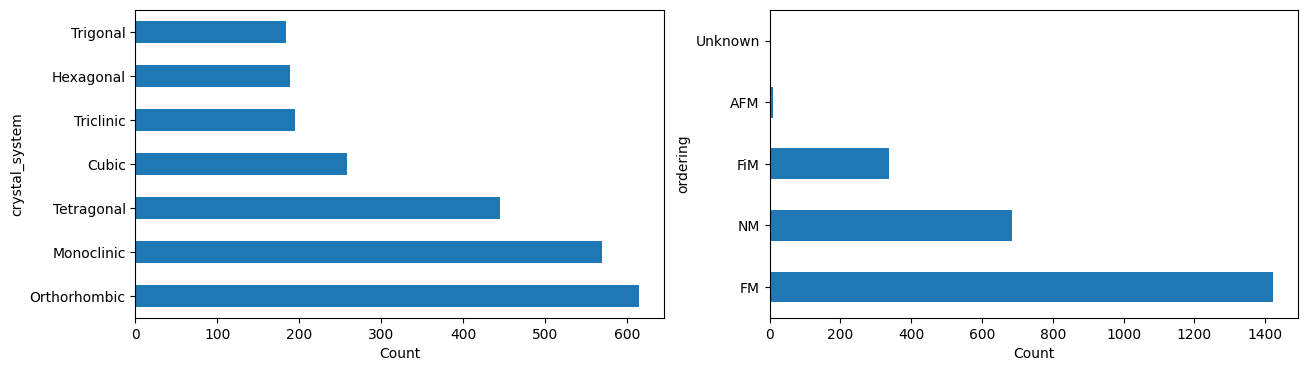

In [ ]:
plt.subplot(1,2,1)
a_df_copy['crystal_system'].value_counts().plot(kind='barh',xlabel='Count')
plt.subplot(1,2,2)
a_df_copy['ordering'].value_counts().plot(kind='barh',xlabel='Count')

In [ ]:
a_df_copy.columns

Index(['nsites', 'formula_pretty', 'volume', 'density', 'density_atomic',
       'uncorrected_energy_per_atom', 'energy_per_atom',
       'formation_energy_per_atom', 'energy_above_hull', 'is_stable',
       'band_gap', 'efermi', 'is_gap_direct', 'is_metal', 'is_magnetic',
       'ordering', 'total_magnetization', 'total_magnetization_normalized_vol',
       'total_magnetization_normalized_formula_units', 'num_magnetic_sites',
       'num_unique_magnetic_sites', 'theoretical', 'crystal_system'],
      dtype='object')

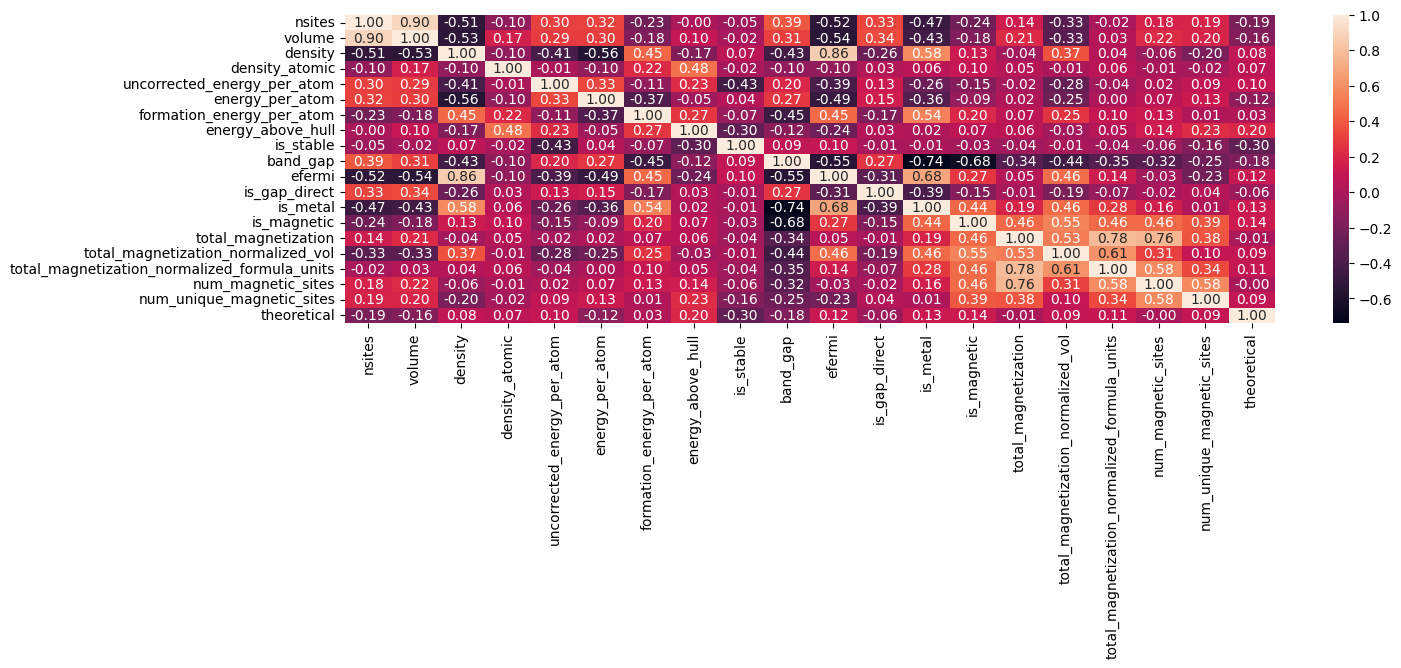

In [ ]:
##correlation coefficients
ct = a_df_copy.corr(numeric_only=True)
sns.heatmap(ct,annot=True,fmt='.2f')
plt.xticks(rotation=90)
plt.yticks(rotation=0);

In [ ]:
###separate target from features
y = a_df_copy['formation_energy_per_atom']
y

0       0.089671
1       0.097511
2       0.281440
3       0.385251
4       0.166463
          ...   
2448   -3.693010
2449   -1.742102
2450   -3.642410
2451   -0.223350
2452    0.017051
Name: formation_energy_per_atom, Length: 2453, dtype: float64

In [ ]:
X = a_df_copy.drop('formation_energy_per_atom',axis=1)

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2453 entries, 0 to 2452
Data columns (total 22 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   nsites                                        2453 non-null   int64  
 1   formula_pretty                                2453 non-null   object 
 2   volume                                        2453 non-null   float64
 3   density                                       2453 non-null   float64
 4   density_atomic                                2453 non-null   float64
 5   uncorrected_energy_per_atom                   2453 non-null   float64
 6   energy_per_atom                               2453 non-null   float64
 7   energy_above_hull                             2453 non-null   float64
 8   is_stable                                     2453 non-null   int8   
 9   band_gap                                      2453 non-null   f

In [ ]:
X.isnull().sum()

nsites                                          0
formula_pretty                                  0
volume                                          0
density                                         0
density_atomic                                  0
uncorrected_energy_per_atom                     0
energy_per_atom                                 0
energy_above_hull                               0
is_stable                                       0
band_gap                                        0
efermi                                          2
is_gap_direct                                   0
is_metal                                        0
is_magnetic                                     0
ordering                                        0
total_magnetization                             0
total_magnetization_normalized_vol              0
total_magnetization_normalized_formula_units    0
num_magnetic_sites                              0
num_unique_magnetic_sites                       0
theoretical                                     0
crystal_system                                  0
dtype: int64

In [ ]:
X['efermi']=X['efermi'].fillna(X['efermi'].mean())

In [ ]:
X.isnull().sum()

nsites                                          0
formula_pretty                                  0
volume                                          0
density                                         0
density_atomic                                  0
uncorrected_energy_per_atom                     0
energy_per_atom                                 0
energy_above_hull                               0
is_stable                                       0
band_gap                                        0
efermi                                          0
is_gap_direct                                   0
is_metal                                        0
is_magnetic                                     0
ordering                                        0
total_magnetization                             0
total_magnetization_normalized_vol              0
total_magnetization_normalized_formula_units    0
num_magnetic_sites                              0
num_unique_magnetic_sites                       0
theoretical                                     0
crystal_system                                  0
dtype: int64

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2453 entries, 0 to 2452
Data columns (total 22 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   nsites                                        2453 non-null   int64  
 1   formula_pretty                                2453 non-null   object 
 2   volume                                        2453 non-null   float64
 3   density                                       2453 non-null   float64
 4   density_atomic                                2453 non-null   float64
 5   uncorrected_energy_per_atom                   2453 non-null   float64
 6   energy_per_atom                               2453 non-null   float64
 7   energy_above_hull                             2453 non-null   float64
 8   is_stable                                     2453 non-null   int8   
 9   band_gap                                      2453 non-null   f

In [ ]:
##get dummies for the crystal_symmetry
a=X.copy(deep=True)
col_name = ''
a = pd.get_dummies(a['crystal_system'],drop_first=True,dtype=int)

In [ ]:
a.head()

Hexagonal  Monoclinic  Orthorhombic  Tetragonal  Triclinic  Trigonal
0          0           0             0           1          0         0
1          0           0             0           1          0         0
2          0           1             0           0          0         0
3          1           0             0           0          0         0
4          0           0             0           0          0         0

In [ ]:
##concatenation
X = pd.concat([X,a],axis=1)

In [ ]:
X.drop('crystal_system',axis=1,inplace=True)
X.head()

nsites formula_pretty      volume    density  density_atomic  \
0      30              U  576.770100  20.558779       19.225670   
1      30              U  608.672029  19.481245       20.289068   
2       6              U  125.243546  18.935409       20.873924   
3       3              U   56.552425  20.967605       18.850808   
4       4              U   74.358664  21.262152       18.589666   

   uncorrected_energy_per_atom  energy_per_atom  energy_above_hull  is_stable  \
0                   -11.201739       -79.852365           0.089671          0   
1                   -79.844526       -79.844526           0.097511          0   
2                   -11.009970       -79.660596           0.281440          0   
3                   -10.906159       -79.556785           0.385251          0   
4                   -11.124947       -79.775573           0.166463          0   

   band_gap  ...  total_magnetization_normalized_formula_units  \
0       0.0  ...                                  3.446667e-06   
1       0.0  ...                                  4.928487e-01   
2       0.0  ...                                  1.316750e-01   
3       0.0  ...                                  7.480000e-05   
4       0.0  ...                                  2.250000e-07   

   num_magnetic_sites  num_unique_magnetic_sites  theoretical Hexagonal  \
0                 0.0                        0.0            0         0   
1                20.0                        5.0            0         0   
2                 0.0                        0.0            0         0   
3                 0.0                        0.0            1         1   
4                 0.0                        0.0            1         0   

   Monoclinic  Orthorhombic  Tetragonal  Triclinic  Trigonal  
0           0             0           1          0         0  
1           0             0           1          0         0  
2           1             0           0          0         0  
3           0             0           0          0         0  
4           0             0           0          0         0  

[5 rows x 27 columns]

In [ ]:
X.columns

Index(['nsites', 'formula_pretty', 'volume', 'density', 'density_atomic',
       'uncorrected_energy_per_atom', 'energy_per_atom', 'energy_above_hull',
       'is_stable', 'band_gap', 'efermi', 'is_gap_direct', 'is_metal',
       'is_magnetic', 'ordering', 'total_magnetization',
       'total_magnetization_normalized_vol',
       'total_magnetization_normalized_formula_units', 'num_magnetic_sites',
       'num_unique_magnetic_sites', 'theoretical', 'Hexagonal', 'Monoclinic',
       'Orthorhombic', 'Tetragonal', 'Triclinic', 'Trigonal'],
      dtype='object')

<Axes: >

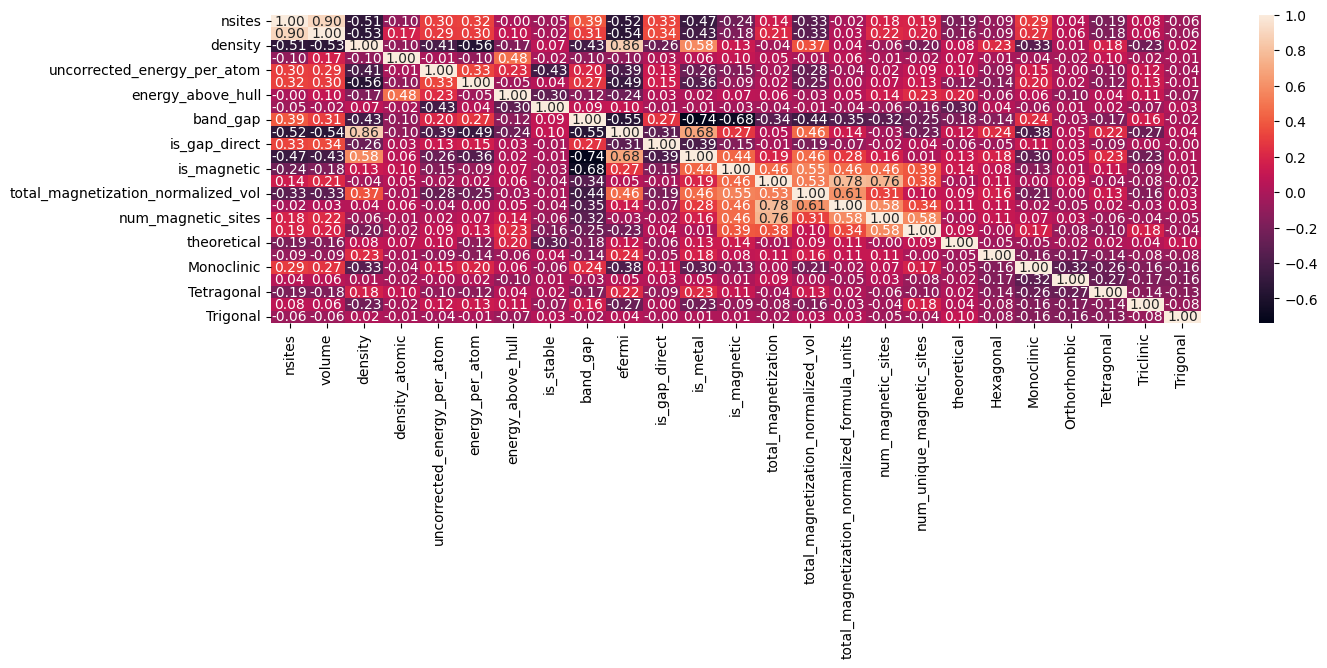

In [ ]:
final_correlation_table = X.corr(numeric_only=True)
sns.heatmap(final_correlation_table,annot=True,fmt='.2f')

In [ ]:
x = X.copy(deep=True)

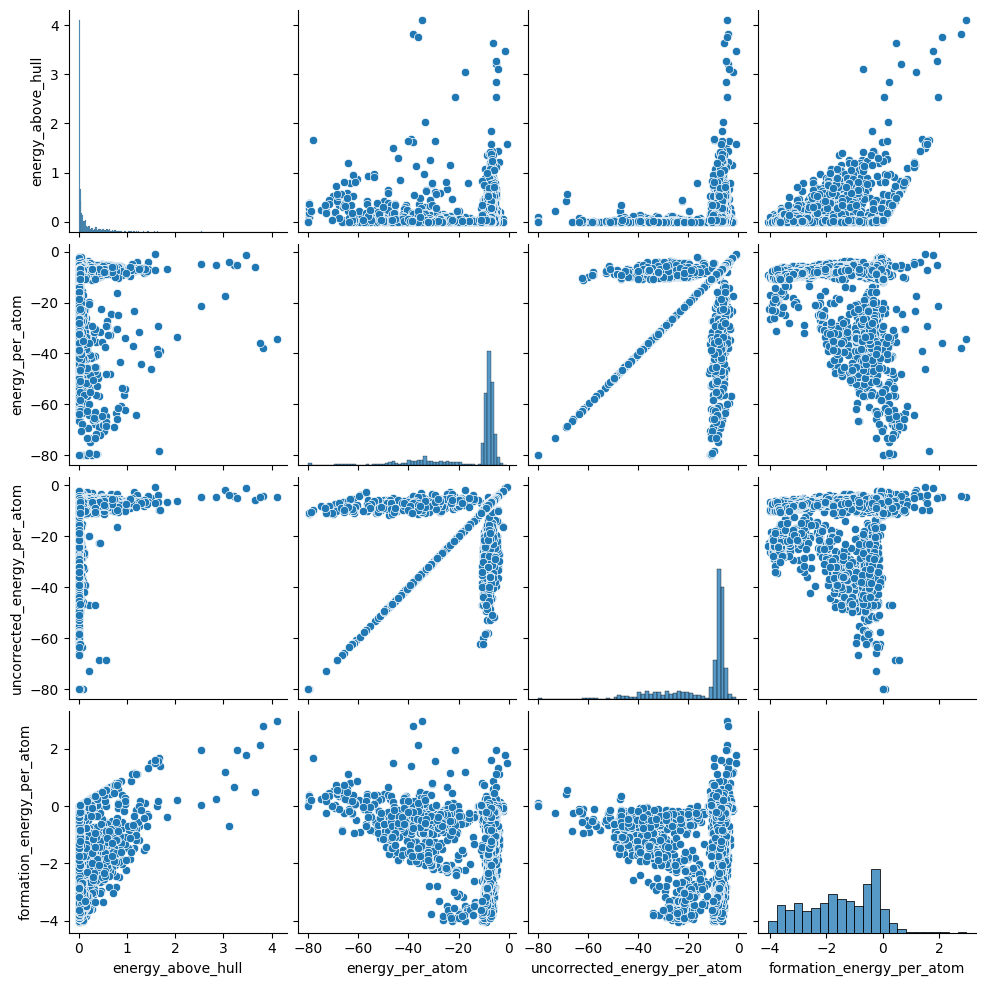

In [ ]:
sns.pairplot(a_df_copy[['energy_above_hull','energy_per_atom','uncorrected_energy_per_atom','formation_energy_per_atom']])

In [ ]:
##dropping possible correlated features such as energy features
x.drop(['energy_per_atom','uncorrected_energy_per_atom'],axis=1,inplace=True)

In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2453 entries, 0 to 2452
Data columns (total 25 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   nsites                                        2453 non-null   int64  
 1   formula_pretty                                2453 non-null   object 
 2   volume                                        2453 non-null   float64
 3   density                                       2453 non-null   float64
 4   density_atomic                                2453 non-null   float64
 5   energy_above_hull                             2453 non-null   float64
 6   is_stable                                     2453 non-null   int8   
 7   band_gap                                      2453 non-null   float64
 8   efermi                                        2453 non-null   float64
 9   is_gap_direct                                 2453 non-null   i

In [ ]:
a=x.copy(deep=True)
col_name = ''
a = pd.get_dummies(a['ordering'],drop_first=True,dtype=int)

In [ ]:
x = pd.concat([x,a],axis=1)

In [ ]:
x.drop('formula_pretty',axis=1,inplace=True)

In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2453 entries, 0 to 2452
Data columns (total 28 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   nsites                                        2453 non-null   int64  
 1   volume                                        2453 non-null   float64
 2   density                                       2453 non-null   float64
 3   density_atomic                                2453 non-null   float64
 4   energy_above_hull                             2453 non-null   float64
 5   is_stable                                     2453 non-null   int8   
 6   band_gap                                      2453 non-null   float64
 7   efermi                                        2453 non-null   float64
 8   is_gap_direct                                 2453 non-null   int8   
 9   is_metal                                      2453 non-null   i

In [ ]:
display(x.head(10))

nsites      volume    density  density_atomic  energy_above_hull  \
0      30  576.770100  20.558779       19.225670           0.089671   
1      30  608.672029  19.481245       20.289068           0.097511   
2       6  125.243546  18.935409       20.873924           0.281440   
3       3   56.552425  20.967605       18.850808           0.385251   
4       4   74.358664  21.262152       18.589666           0.166463   
5       1   19.987238  19.775434       19.987238           0.371577   
6       1   18.687588  21.150740       18.687588           0.268548   
7      16  338.056645  18.707222       21.128540           0.354543   
8      32  668.729042  18.913792       20.897783           0.360813   
9      32  676.113289  18.707222       21.128540           0.355389   

   is_stable  band_gap     efermi  is_gap_direct  is_metal  ...  Hexagonal  \
0          0       0.0  14.573554              0         1  ...          0   
1          0       0.0  14.722471              0         1  ...          0   
2          0       0.0  14.378293              0         1  ...          0   
3          0       0.0  15.180052              0         1  ...          1   
4          0       0.0  15.790858              0         1  ...          0   
5          0       0.0  14.151880              0         1  ...          0   
6          0       0.0  14.995531              0         1  ...          0   
7          0       0.0  14.372222              0         1  ...          0   
8          0       0.0  14.547749              0         1  ...          0   
9          0       0.0  14.372237              0         1  ...          0   

  Monoclinic  Orthorhombic  Tetragonal  Triclinic  Trigonal  FM  FiM  NM  \
0          0             0           1          0         0   0    0   1   
1          0             0           1          0         0   1    0   0   
2          1             0           0          0         0   0    0   1   
3          0             0           0          0         0   0    0   1   
4          0             0           0          0         0   0    0   1   
5          0             0           0          0         0   1    0   0   
6          0             0           0          0         0   0    0   1   
7          0             1           0          0         0   0    0   1   
8          0             1           0          0         0   0    0   1   
9          0             1           0          0         0   0    0   1   

   Unknown  
0        0  
1        0  
2        0  
3        0  
4        0  
5        0  
6        0  
7        0  
8        0  
9        0  

[10 rows x 28 columns]

In [ ]:
x.columns

Index(['nsites', 'volume', 'density', 'density_atomic', 'energy_above_hull',
       'is_stable', 'band_gap', 'efermi', 'is_gap_direct', 'is_metal',
       'is_magnetic', 'ordering', 'total_magnetization',
       'total_magnetization_normalized_vol',
       'total_magnetization_normalized_formula_units', 'num_magnetic_sites',
       'num_unique_magnetic_sites', 'theoretical', 'Hexagonal', 'Monoclinic',
       'Orthorhombic', 'Tetragonal', 'Triclinic', 'Trigonal', 'FM', 'FiM',
       'NM', 'Unknown'],
      dtype='object')

In [ ]:
x.drop('ordering',axis=1,inplace=True)

In [ ]:
##scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

In [ ]:
X_scaled  = pd.DataFrame(X_scaled,columns=x.columns)
X_scaled.head()

nsites    volume   density  density_atomic  energy_above_hull  is_stable  \
0  0.011673  0.118134  3.496534       -0.015077          -0.174183  -0.689879   
1  0.011673  0.179708  3.201225        0.040766          -0.150791  -0.689879   
2 -0.744344 -0.753352  3.051633        0.071479           0.398003  -0.689879   
3 -0.838846 -0.885932  3.608576       -0.034762           0.707746  -0.689879   
4 -0.807345 -0.851564  3.689300       -0.048476           0.054944  -0.689879   

   band_gap    efermi  is_gap_direct  is_metal  ...  Hexagonal  Monoclinic  \
0 -0.557425  2.229617      -0.311526  0.755263  ...  -0.288101   -0.549561   
1 -0.557425  2.266164      -0.311526  0.755263  ...  -0.288101   -0.549561   
2 -0.557425  2.181696      -0.311526  0.755263  ...  -0.288101    1.819635   
3 -0.557425  2.378462      -0.311526  0.755263  ...   3.471005   -0.549561   
4 -0.557425  2.528365      -0.311526  0.755263  ...  -0.288101   -0.549561   

   Orthorhombic  Tetragonal  Triclinic  Trigonal        FM       FiM  \
0     -0.577821    2.124232   -0.29387 -0.284768 -1.173430 -0.398391   
1     -0.577821    2.124232   -0.29387 -0.284768  0.852203 -0.398391   
2     -0.577821   -0.470758   -0.29387 -0.284768 -1.173430 -0.398391   
3     -0.577821   -0.470758   -0.29387 -0.284768 -1.173430 -0.398391   
4     -0.577821   -0.470758   -0.29387 -0.284768 -1.173430 -0.398391   

         NM   Unknown  
0  1.608184 -0.034993  
1 -0.621819 -0.034993  
2  1.608184 -0.034993  
3  1.608184 -0.034993  
4  1.608184 -0.034993  

[5 rows x 27 columns]

In [ ]:
##using PCA to measure feature importance
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components = len(X.columns))
fitted_pca = pca.fit(X_scaled,y)

In [ ]:
fitted_pca.explained_variance_ratio_

array([0.22177235, 0.14136281, 0.07149321, 0.06148773, 0.0496178 ,
       0.048217  , 0.04396147, 0.0420305 , 0.03930113, 0.03903929,
       0.03670847, 0.03416105, 0.03123805, 0.02470664, 0.02335864,
       0.02034136, 0.01520932, 0.01437548, 0.01283805, 0.007845  ,
       0.00657155, 0.00447691, 0.00393001, 0.00380732, 0.00186145,
       0.00028739, 0.        ])

In [ ]:
fitted_pca.get_feature_names_out()

array(['pca0', 'pca1', 'pca2', 'pca3', 'pca4', 'pca5', 'pca6', 'pca7',
       'pca8', 'pca9', 'pca10', 'pca11', 'pca12', 'pca13', 'pca14',
       'pca15', 'pca16', 'pca17', 'pca18', 'pca19', 'pca20', 'pca21',
       'pca22', 'pca23', 'pca24', 'pca25', 'pca26'], dtype=object)

In [ ]:
pd.DataFrame(list(zip(fitted_pca.feature_names_in_,range(1,len(fitted_pca.explained_variance_ratio_)+1), fitted_pca.explained_variance_ratio_)),
             columns=('feature_names','component','variance_ratio')).sort_values(by='variance_ratio',ascending=False)

feature_names  component  variance_ratio
0                                         nsites          1        0.221772
1                                         volume          2        0.141363
2                                        density          3        0.071493
3                                 density_atomic          4        0.061488
4                              energy_above_hull          5        0.049618
5                                      is_stable          6        0.048217
6                                       band_gap          7        0.043961
7                                         efermi          8        0.042031
8                                  is_gap_direct          9        0.039301
9                                       is_metal         10        0.039039
10                                   is_magnetic         11        0.036708
11                           total_magnetization         12        0.034161
12            total_magnetization_normalized_vol         13        0.031238
13  total_magnetization_normalized_formula_units         14        0.024707
14                            num_magnetic_sites         15        0.023359
15                     num_unique_magnetic_sites         16        0.020341
16                                   theoretical         17        0.015209
17                                     Hexagonal         18        0.014375
18                                    Monoclinic         19        0.012838
19                                  Orthorhombic         20        0.007845
20                                    Tetragonal         21        0.006572
21                                     Triclinic         22        0.004477
22                                      Trigonal         23        0.003930
23                                            FM         24        0.003807
24                                           FiM         25        0.001861
25                                            NM         26        0.000287
26                                       Unknown         27        0.000000

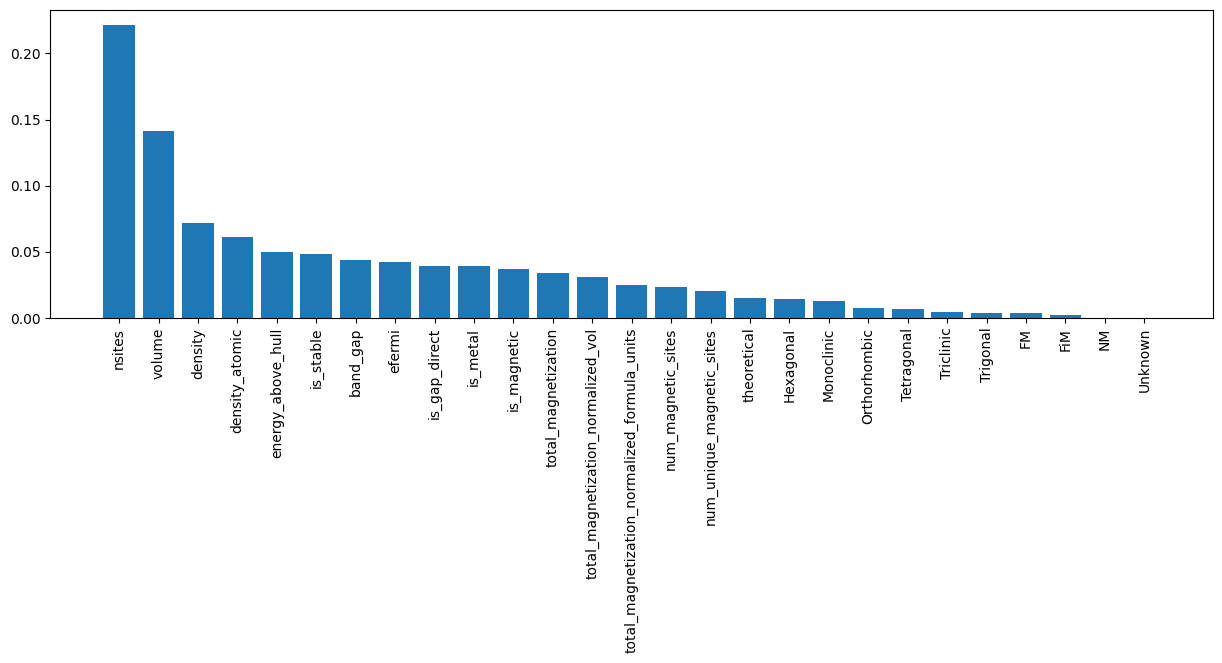

In [ ]:
plt.bar((range(1, len(pca.explained_variance_ratio_)+1)), pca.explained_variance_ratio_)
plt.xticks(ticks = range(1,len(fitted_pca.feature_names_in_)+1),labels=fitted_pca.feature_names_in_,rotation=90);

In [ ]:
##from the above, the highest variance is held in the nsites,volume and density features

In [ ]:
##calculating the cumulative percentages for accuracy as explained by the components
var_cumu = np.cumsum(fitted_pca.explained_variance_ratio_)
var_cumu

array([0.22177235, 0.36313516, 0.43462837, 0.4961161 , 0.5457339 ,
       0.59395091, 0.63791238, 0.67994288, 0.71924401, 0.7582833 ,
       0.79499178, 0.82915283, 0.86039088, 0.88509752, 0.90845616,
       0.92879751, 0.94400684, 0.95838232, 0.97122037, 0.97906537,
       0.98563692, 0.99011383, 0.99404384, 0.99785116, 0.99971261,
       1.        , 1.        ])

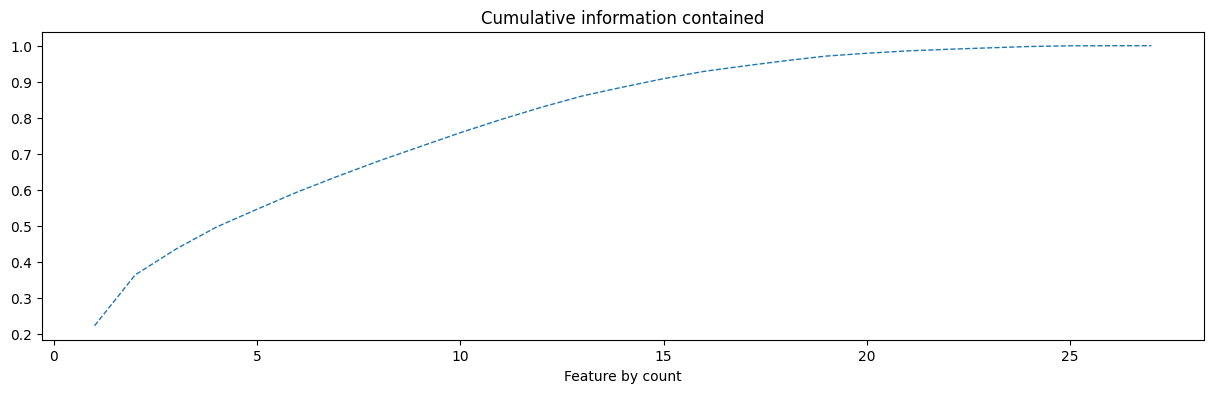

In [ ]:
plt.plot(range(1, len(var_cumu)+1), var_cumu,linewidth=1,linestyle='--')
plt.title('Cumulative Summary of Feature Variance')
plt.xlabel('Feature by count')
plt.title('Cumulative information contained')
plt.show()

In [ ]:
##from the diagram we can see that approximately 15 features in the feature dataset retains 90%+ of the information

In [ ]:
new_fitted_pca_components = PCA(n_components=15, random_state=42)
new_fitted_pca_components.fit(X_scaled)

PCA(n_components=15, random_state=42)

In [ ]:
new_fitted_pca_components.explained_variance_ratio_

array([0.22177235, 0.14136281, 0.07149321, 0.06148773, 0.0496178 ,
       0.048217  , 0.04396147, 0.0420305 , 0.03930113, 0.03903929,
       0.03670847, 0.03416105, 0.03123805, 0.02470664, 0.02335864])

In [122]:
info_ret_df = pd.DataFrame(list(zip(new_fitted_pca_components.feature_names_in_,range(1,len(new_fitted_pca_components.explained_variance_ratio_)+1),
                      new_fitted_pca_components.explained_variance_ratio_)),
             columns=('feature_names','component','variance_ratio')).sort_values(by='variance_ratio',ascending=True)
info_ret_df

feature_names  component  variance_ratio
14                            num_magnetic_sites         15        0.023359
13  total_magnetization_normalized_formula_units         14        0.024707
12            total_magnetization_normalized_vol         13        0.031238
11                           total_magnetization         12        0.034161
10                                   is_magnetic         11        0.036708
9                                       is_metal         10        0.039039
8                                  is_gap_direct          9        0.039301
7                                         efermi          8        0.042031
6                                       band_gap          7        0.043961
5                                      is_stable          6        0.048217
4                              energy_above_hull          5        0.049618
3                                 density_atomic          4        0.061488
2                                        density          3        0.071493
1                                         volume          2        0.141363
0                                         nsites          1        0.221772

In [ ]:
##calculating the cumulative percentages for accuracy as explained by the components
var_cumu = np.cumsum(new_fitted_pca_components.explained_variance_ratio_)
var_cumu

array([0.22177235, 0.36313516, 0.43462837, 0.4961161 , 0.5457339 ,
       0.59395091, 0.63791238, 0.67994288, 0.71924401, 0.7582833 ,
       0.79499178, 0.82915283, 0.86039088, 0.88509752, 0.90845616])

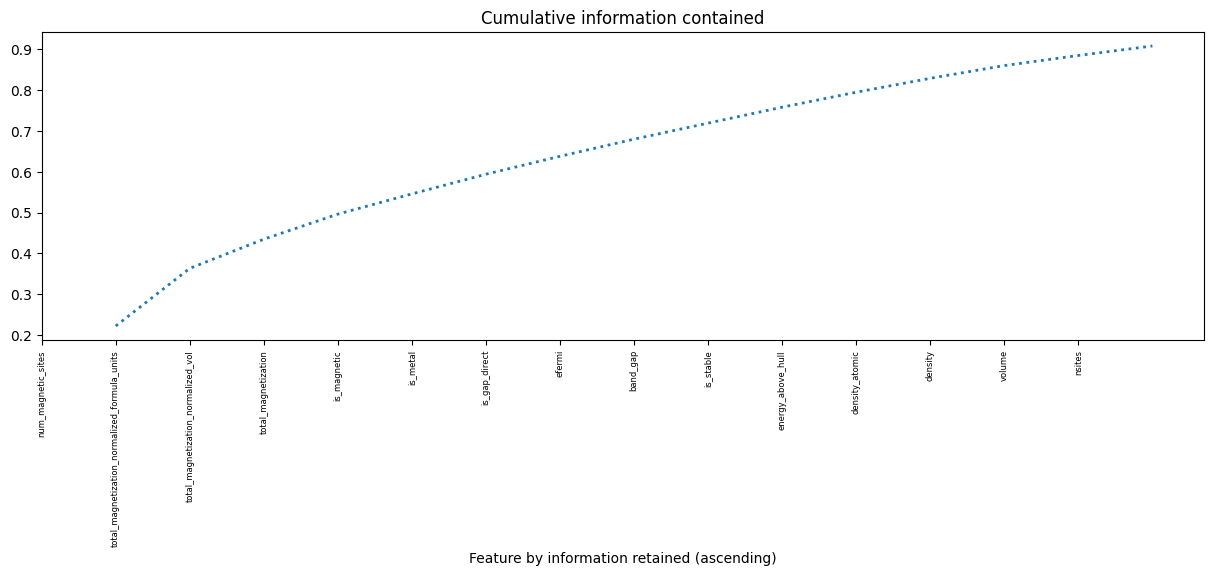

In [125]:
plt.plot(range(1, len(var_cumu)+1), var_cumu,linewidth=2,linestyle=':')
plt.title('Cumulative Summary of Feature Variance')
plt.xlabel('Feature by information retained (ascending)')
plt.title('Cumulative information contained')
plt.xticks(ticks=range(0,len(var_cumu)),labels=info_ret_df['feature_names'].values)
plt.xticks(rotation=90)
plt.tick_params(axis='x',labelsize=6)
plt.show()

In [ ]:
##that is most of the information in the data is found in approximately 15 features which above 90% of variation/inforamtion

In [ ]:
#configuring OLS Estimation for Linear Regression using stats models api
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE,RFECV
from sklearn.model_selection import train_test_split

In [134]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y, test_size=0.1, random_state=42,shuffle=True)
len(X_train),len(y_train),len(X_test),len(y_test)

(2207, 2207, 246, 246)

In [309]:
X_train.shape,X_scaled.shape

((1961, 15), (2453, 27))

In [135]:
##creating a validation split
val_split = X_test.shape[0]/X_train.shape[0]

X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size=val_split,random_state=42,shuffle=True)

#get len of datasets
len(X_train),len(y_train),len(X_test),len(y_test),len(X_val),len(y_val)

(1961, 1961, 246, 246, 246, 246)

In [249]:
#build stats model for linear regression
class LinearRegOLS():
    def __init__(self,features,target):
        self.X = features
        self.y = target
        self.linear_model=None

    def forward_calc(self,x):
        x = sm.add_constant(self.X)
        self.linear_model = sm.OLS(self.y,x).fit()
        print(self.linear_model.summary())
        return self.linear_model

    def predict(self, x):
        if self.linear_model is None:
            raise ValueError("Fit the model first with forward_calc()")
        x_with_const = sm.add_constant(x)
        return self.linear_model.predict(x_with_const)

    def residt(self,x=None):
        if self.linear_model is None:
            raise ValueError("Fit the model first with forward_calc()")
        if x is None:
            x = self.X
        x_with_const = sm.add_constant(x)
        predicted_values = self.linear_model.predict(x_with_const)
        residuals = self.y - predicted_values
        self.residuals = residuals
        return residuals

    def checkVIF(self,x,threshold=5.0):
        x = pd.DataFrame({'features':self.X.columns,'VIF':[variance_inflation_factor(self.X.values,i) for i in range(self.X.shape[1])]}).sort_values(by='VIF',ascending=False)
        #x['VIF']=np.where(np.isinf(x['VIF']),np.nan,round(x['VIF'],2))
        x['status_for_inc_variance'] = np.where(x['VIF']>threshold,'high','low')
        return x

# MODEL FITING

In [137]:
print('shape of train data=',X_train.shape)

shape of train data= (1961, 27)


In [138]:
X_train = pd.DataFrame(X_train)
X_train.head()

nsites    volume   density  density_atomic  energy_above_hull  \
720  -0.492338 -0.696596 -0.348391       -0.444603          -0.211389   
2033 -0.681342 -0.673165  2.265984        0.070153           0.577247   
393  -0.523839 -0.617799 -0.489348       -0.235065          -0.441737   
1711 -0.744344 -0.791785  0.510025       -0.102800          -0.049450   
1267 -0.618341 -0.702942 -0.163819       -0.229832          -0.441737   

      is_stable  band_gap    efermi  is_gap_direct  is_metal  ...  Hexagonal  \
720   -0.689879  1.883416 -0.756107      -0.311526 -1.324042  ...  -0.288101   
2033  -0.689879 -0.557425  1.614826      -0.311526  0.755263  ...   3.471005   
393    1.449530 -0.557425  0.823052      -0.311526  0.755263  ...  -0.288101   
1711  -0.689879 -0.557425  1.075348      -0.311526  0.755263  ...  -0.288101   
1267   1.449530 -0.557425  0.198630      -0.311526  0.755263  ...  -0.288101   

      Monoclinic  Orthorhombic  Tetragonal  Triclinic  Trigonal        FM  \
720    -0.549561      1.730640   -0.470758   -0.29387 -0.284768 -1.173430   
2033   -0.549561     -0.577821   -0.470758   -0.29387 -0.284768 -1.173430   
393    -0.549561     -0.577821    2.124232   -0.29387 -0.284768  0.852203   
1711   -0.549561     -0.577821   -0.470758   -0.29387  3.511627  0.852203   
1267   -0.549561     -0.577821   -0.470758   -0.29387 -0.284768  0.852203   

           FiM        NM   Unknown  
720  -0.398391  1.608184 -0.034993  
2033 -0.398391  1.608184 -0.034993  
393  -0.398391 -0.621819 -0.034993  
1711 -0.398391 -0.621819 -0.034993  
1267 -0.398391 -0.621819 -0.034993  

[5 rows x 27 columns]

In [139]:
#trim the data
info_cols = [col for col in info_ret_df['feature_names'] if col in X_train.columns]
X_train = X_train[info_cols]

In [141]:
X_train.head().shape

(5, 15)

In [142]:
X_test = X_test[info_cols]
X_val = X_val[info_cols]

In [200]:
X_test.shape

(246, 15)

# MODEL_1 FITTING

In [251]:
model1 = LinearRegOLS(X_train,y_train)

In [252]:
print('=====MODEL_1======\n\nFeatures passed as is, no dropping of features yet')
model1.forward_calc(X_train)

=====MODEL_1======

Features passed as is, no dropping of features yet
                                OLS Regression Results                               
Dep. Variable:     formation_energy_per_atom   R-squared:                       0.453
Model:                                   OLS   Adj. R-squared:                  0.449
Method:                        Least Squares   F-statistic:                     107.3
Date:                       Sat, 11 Oct 2025   Prob (F-statistic):          1.87e-241
Time:                               16:10:54   Log-Likelihood:                -2607.5
No. Observations:                       1961   AIC:                             5247.
Df Residuals:                           1945   BIC:                             5336.
Df Model:                                 15                                         
Covariance Type:                   nonrobust                                         
                                                   coef    std err   

In [253]:
model1.checkVIF(X_train)

features        VIF  \
13                                        volume  10.502993   
14                                        nsites   9.708478   
7                                         efermi   5.910253   
3                            total_magnetization   4.744446   
12                                       density   4.437704   
8                                       band_gap   3.849893   
5                                       is_metal   3.217873   
1   total_magnetization_normalized_formula_units   2.979183   
0                             num_magnetic_sites   2.900750   
4                                    is_magnetic   2.849374   
2             total_magnetization_normalized_vol   2.749312   
11                                density_atomic   1.924131   
10                             energy_above_hull   1.583152   
6                                  is_gap_direct   1.263992   
9                                      is_stable   1.152205   

   status_for_inc_variance  
13                    high  
14                    high  
7                     high  
3                      low  
12                     low  
8                      low  
5                      low  
1                      low  
0                      low  
4                      low  
2                      low  
11                     low  
10                     low  
6                      low  
9                      low

In [254]:
#check model performance on train data
train_predictions_model1 = model1.predict(X_train)

#check performance with metrics, MAE and RMSE,this is likely to be the same as the
##values in the OLS summary for model1 fitting
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error,mean_absolute_percentage_error

#print the scores
mse_model1_xtrain_unf = mean_squared_error(y_true=y_train,y_pred=train_predictions_model1)
mae_model1_xtrain_unf = mean_absolute_error(y_true=y_train,y_pred=train_predictions_model1)
mape_model1_xtrain_unf = mean_absolute_percentage_error(y_true=y_train,y_pred=train_predictions_model1)
rsqr_model1_xtrain_unf = r2_score(y_true=y_train,y_pred=train_predictions_model1)
adj_rsquare_model1_xtrain_unf = 1-(1-rsqr_model1_xtrain_unf) * (len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)

print('mean square error for model1 train data(X_train)=',mse_model1_xtrain_unf)
print('mean absolute error for model1 train data(X_train)=',mae_model1_xtrain_unf)
print('mean absolute (MAPE) error for model1 train data(X_train)=',mape_model1_xtrain_unf)
print('RS error for model1 train data(X_train)=',rsqr_model1_xtrain_unf)
print('Adj RS error for model1 train data(X_train)=',adj_rsquare_model1_xtrain_unf)

mean square error for model1 train data(X_train)= 0.8364706777956636
mean absolute error for model1 train data(X_train)= 0.7195783764731042
mean absolute (MAPE) error for model1 train data(X_train)= 228447152672.50177
RS error for model1 train data(X_train)= 0.4528020426841195
Adj RS error for model1 train data(X_train)= 0.44858200702358564


In [255]:
#check residuals
residt_model1_xtrain_unf = model1.residt(X_train)
residt_model1_xtrain_unf

720     0.128414
2033    0.374889
393     1.312802
1711    0.974787
1267   -1.978490
          ...   
713     0.715697
1937   -2.047873
1378    0.593692
1859    0.318009
865     0.321210
Length: 1961, dtype: float64

<Figure size 500x400 with 0 Axes>

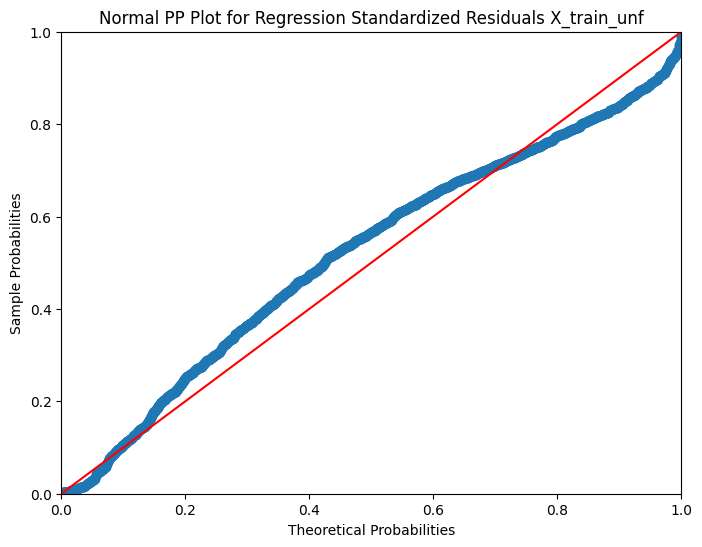

In [256]:
##visualize the residuals with ppplot
probplot_model1_xtrain_unf = sm.ProbPlot(residt_model1_xtrain_unf)
plt.figure(figsize=(5,4))
probplot_model1_xtrain_unf.ppplot(line='45',)
plt.title('Normal PP Plot for Regression Standardized Residuals X_train_unf')
plt.show()

In [257]:
##data is not normally diestribbuted

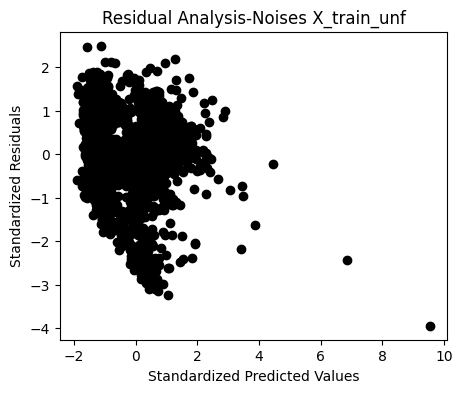

In [258]:
###test of homoscedasticity
def get_standard_values(parm):
    return (parm - parm.mean())/parm.std()

plt.figure(figsize=(5,4))
plt.scatter(get_standard_values(train_predictions_model1), get_standard_values(residt_model1_xtrain_unf),color='black')
plt.title('Residual Analysis-Noises X_train_unf')
plt.xlabel('Standardized Predicted Values')
plt.ylabel('Standardized Residuals')
plt.show()

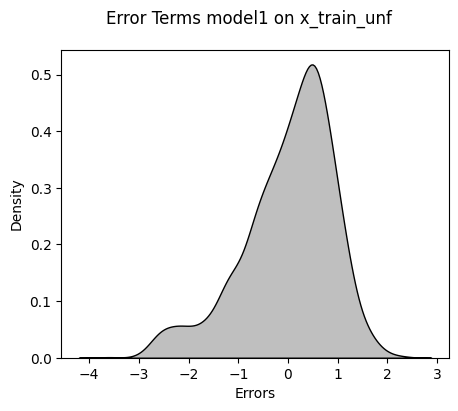

In [259]:
#check with kde plot
plt.figure(figsize=(5,4))
sns.kdeplot((y_train-train_predictions_model1),color='black',fill=True)
plt.suptitle('Error Terms model1 on x_train_unf', fontsize=12)
plt.xlabel('Errors', fontsize=10)
plt.show()

In [260]:
#TEST DATA
#make predictions with model1
test_predictions_model1 = model1.predict(X_test)
test_predictions_model1

2115   -1.107117
700    -1.487268
1165   -2.381885
2417   -1.700101
1626   -0.835306
          ...   
1717   -1.034762
632    -2.307717
1602    0.129351
1272   -2.517877
2099   -0.994233
Length: 246, dtype: float64

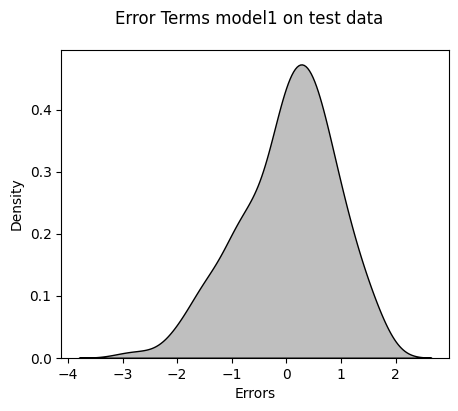

In [261]:
#check with kde plot
plt.figure(figsize=(5,4))
sns.kdeplot((y_test-test_predictions_model1),color='black',fill=True)
plt.suptitle('Error Terms model1 on test data', fontsize=12)
plt.xlabel('Errors', fontsize=10)
plt.show()

In [262]:
#MODEL REFINEMENT
##refining the model using VIF and RFEto select the best features
from sklearn.feature_selection import RFE

#print VIF
model1.checkVIF(X_train)

features        VIF  \
13                                        volume  10.502993   
14                                        nsites   9.708478   
7                                         efermi   5.910253   
3                            total_magnetization   4.744446   
12                                       density   4.437704   
8                                       band_gap   3.849893   
5                                       is_metal   3.217873   
1   total_magnetization_normalized_formula_units   2.979183   
0                             num_magnetic_sites   2.900750   
4                                    is_magnetic   2.849374   
2             total_magnetization_normalized_vol   2.749312   
11                                density_atomic   1.924131   
10                             energy_above_hull   1.583152   
6                                  is_gap_direct   1.263992   
9                                      is_stable   1.152205   

   status_for_inc_variance  
13                    high  
14                    high  
7                     high  
3                      low  
12                     low  
8                      low  
5                      low  
1                      low  
0                      low  
4                      low  
2                      low  
11                     low  
10                     low  
6                      low  
9                      low

In [244]:
#using RFE
#to use RFE I will first implement sklearn LinearRegression model
from sklearn.linear_model import LinearRegression

lm = LinearRegression(fit_intercept=True,n_jobs=os.cpu_count())

#implement RFE
rfe = RFE(estimator=lm,n_features_to_select=10).fit(X_train,y_train)

In [268]:
rfe_cols = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)))
rfe_cols = rfe_cols[rfe_cols[1]==True]
rfe_cols

0     1  2
0    num_magnetic_sites  True  1
3   total_magnetization  True  1
4           is_magnetic  True  1
5              is_metal  True  1
7                efermi  True  1
8              band_gap  True  1
10    energy_above_hull  True  1
11       density_atomic  True  1
12              density  True  1
14               nsites  True  1

In [270]:
##implement rfe results on model/create new model on rfe results
X_train_rfe =  [col for col in rfe_cols[0] if col in X_train.columns]
X_train_rfe = X_train[X_train_rfe]
X_train_rfe

num_magnetic_sites  total_magnetization  is_magnetic  is_metal  \
720            -0.741568            -0.751493    -1.603308 -1.324042   
2033           -0.741568            -0.709271    -1.603308  0.755263   
393            -0.543628            -0.294042     0.623710  0.755263   
1711           -0.543628            -0.733181     0.623710  0.755263   
1267           -0.345688            -0.457684     0.623710  0.755263   
...                  ...                  ...          ...       ...   
713            -0.741568            -0.751390    -1.603308 -1.324042   
1937           -0.345688            -0.310530     0.623710  0.755263   
1378           -0.345688            -0.166165     0.623710  0.755263   
1859           -0.741568            -0.462758    -1.603308 -1.324042   
865             0.841950            -0.567282     0.623710  0.755263   

        efermi  band_gap  energy_above_hull  density_atomic   density  \
720  -0.756107  1.883416          -0.211389       -0.444603 -0.348391   
2033  1.614826 -0.557425           0.577247        0.070153  2.265984   
393   0.823052 -0.557425          -0.441737       -0.235065 -0.489348   
1711  1.075348 -0.557425          -0.049450       -0.102800  0.510025   
1267  0.198630 -0.557425          -0.441737       -0.229832 -0.163819   
...        ...       ...                ...             ...       ...   
713  -1.441251  1.081608           1.154299       -0.096713 -1.070073   
1937  0.497498 -0.557425           0.189432       -0.354779  0.240274   
1378 -0.493330 -0.557425          -0.441737        0.262800 -0.857219   
1859 -1.461355 -0.514024           1.455326       -0.136231 -1.150127   
865   1.330941 -0.557425          -0.441737       -0.167002  0.852524   

        nsites  
720  -0.492338  
2033 -0.681342  
393  -0.523839  
1711 -0.744344  
1267 -0.618341  
...        ...  
713   0.956694  
1937 -0.618341  
1378 -0.177331  
1859 -0.208832  
865  -0.555340  

[1961 rows x 10 columns]

In [271]:
X_test_rfe = X_test[X_train_rfe]
X_val_rfe = X_val[X_train_rfe]

In [272]:
X_train_rfe.shape,y_train.shape

((1961, 10), (1961,))

In [273]:
#set OLS Estimation for new features
model2 = LinearRegOLS(X_train_rfe,y_train)

#printing summary
model2.forward_calc(X_train_rfe)

                                OLS Regression Results                               
Dep. Variable:     formation_energy_per_atom   R-squared:                       0.449
Model:                                   OLS   Adj. R-squared:                  0.446
Method:                        Least Squares   F-statistic:                     159.0
Date:                       Sat, 11 Oct 2025   Prob (F-statistic):          5.11e-244
Time:                               16:49:37   Log-Likelihood:                -2614.0
No. Observations:                       1961   AIC:                             5250.
Df Residuals:                           1950   BIC:                             5311.
Df Model:                                 10                                         
Covariance Type:                   nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------

In [277]:
##from the summary all the selected features prove that the hypothesis of the features being redundant in explaining the response variable
##is false
##howvever the rsquared and adj rsquared reduced implying that the model does not correctly explain the response
#this could be due to non-linearity in the relationship between the target and the response

In [300]:
model2.checkVIF(X_train_rfe)

features       VIF status_for_inc_variance
4               efermi  5.679865                    high
8              density  4.357481                     low
5             band_gap  3.554438                     low
3             is_metal  2.987473                     low
0   num_magnetic_sites  2.746828                     low
1  total_magnetization  2.555415                     low
2          is_magnetic  2.378645                     low
9               nsites  1.718201                     low
6    energy_above_hull  1.422444                     low
7       density_atomic  1.270263                     low

In [279]:
train_rfe_pred_model2 = model2.predict(X_train_rfe)
train_rfe_pred_model2

720    -2.622059
2033    0.010350
393    -1.524209
1711   -1.008685
1267   -1.551477
          ...   
713    -2.126717
1937   -1.207624
1378   -1.770588
1859   -2.210247
865    -0.769411
Length: 1961, dtype: float64

In [281]:
#print the scores
mse_model2_xtrain_xrfe = mean_squared_error(y_true=y_train,y_pred=train_rfe_pred_model2)
mae_model2_xtrain_xrfe = mean_absolute_error(y_true=y_train,y_pred=train_rfe_pred_model2)
mape_model2_xtrain_xrfe = mean_absolute_percentage_error(y_true=y_train,y_pred=train_rfe_pred_model2)
rsqr_model2_xtrain_xrfe = r2_score(y_true=y_train,y_pred=train_rfe_pred_model2)
adj_rsquare_model2_xtrain_rfe = 1-(1-rsqr_model2_xtrain_xrfe) * (len(y_train)-1)/(len(y_train)-X_train_rfe.shape[1]-1)

print('mean square error for model1 train data(X_train)=',mse_model2_xtrain_xrfe)
print('mean absolute error for model1 train data(X_train)=',mae_model2_xtrain_xrfe)
print('mean absolute (MAPE) error for model1 train data(X_train)=',mape_model2_xtrain_xrfe)
print('RS error for model1 train data(X_train)=',rsqr_model2_xtrain_xrfe)
print('Adj RS error for model1 train data(X_train)=',adj_rsquare_model2_xtrain_rfe)

mean square error for model1 train data(X_train)= 0.8420703321412121
mean absolute error for model1 train data(X_train)= 0.7222478948343246
mean absolute (MAPE) error for model1 train data(X_train)= 288636461124.5838
RS error for model1 train data(X_train)= 0.4491388904650436
Adj RS error for model1 train data(X_train)= 0.4463139616981977


In [302]:
#check residuals for model 2
residt_model2_xtrain_xrfe = model2.residt(X_train_rfe)
residt_model2_xtrain_xrfe

720     0.086585
2033    0.331165
393     1.314111
1711    0.916210
1267   -1.957060
          ...   
713     0.671908
1937   -2.063200
1378    0.594085
1859    0.460350
865     0.335604
Length: 1961, dtype: float64

<Figure size 500x400 with 0 Axes>

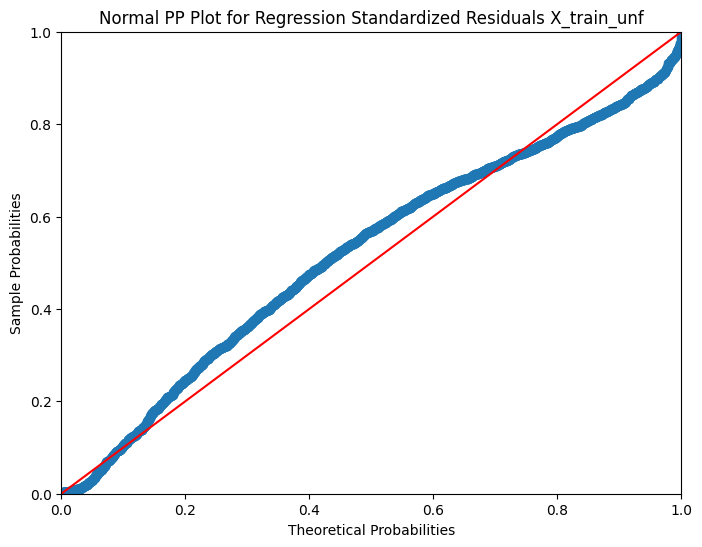

In [303]:
##visualize the residuals with ppplot
probplot_model2_xtrain_xrfe = sm.ProbPlot(residt_model2_xtrain_xrfe)
plt.figure(figsize=(5,4))
probplot_model2_xtrain_xrfe.ppplot(line='45',)
plt.title('Normal PP Plot for Regression Standardized Residuals X_train_unf')
plt.show()

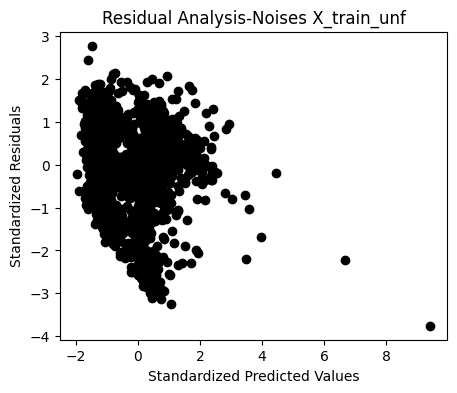

In [305]:
plt.figure(figsize=(5,4))
plt.scatter(get_standard_values(train_rfe_pred_model2), get_standard_values(residt_model2_xtrain_xrfe),color='black')
plt.title('Residual Analysis-Noises X_train_unf')
plt.xlabel('Standardized Predicted Values')
plt.ylabel('Standardized Residuals')
plt.show()

In [283]:
##adjusted rsquared decreased from 0.449 to 0.446 implying that the model did not improve

In [282]:
##no significant improvement in the performance even with the filtering of the features

In [294]:
##refitting the rfe to capture 12 components
rfe_refit = RFE(estimator=lm,n_features_to_select=13).fit(X_train,y_train)

In [296]:
rfe_cols = pd.DataFrame(list(zip(X_train.columns,rfe_refit.support_,rfe_refit.ranking_)))
rfe_cols = rfe_cols[rfe_cols[1]==True]
rfe_cols

0     1  2
0                             num_magnetic_sites  True  1
1   total_magnetization_normalized_formula_units  True  1
2             total_magnetization_normalized_vol  True  1
3                            total_magnetization  True  1
4                                    is_magnetic  True  1
5                                       is_metal  True  1
7                                         efermi  True  1
8                                       band_gap  True  1
10                             energy_above_hull  True  1
11                                density_atomic  True  1
12                                       density  True  1
13                                        volume  True  1
14                                        nsites  True  1

In [304]:
X_train_rfe_2 =  [col for col in rfe_cols[0] if col in X_train.columns]
X_train_rfe_2 = X_train[X_train_rfe_2]
X_train_rfe_2

num_magnetic_sites  total_magnetization_normalized_formula_units  \
720            -0.741568                                     -0.751182   
2033           -0.741568                                     -0.711104   
393            -0.543628                                      0.117254   
1711           -0.543628                                     -0.716417   
1267           -0.345688                                     -0.193407   
...                  ...                                           ...   
713            -0.741568                                     -0.751133   
1937           -0.345688                                      0.085953   
1378           -0.345688                                     -0.195582   
1859           -0.741568                                     -0.203040   
865             0.841950                                     -0.663754   

      total_magnetization_normalized_vol  total_magnetization  is_magnetic  \
720                            -0.893668            -0.751493    -1.603308   
2033                           -0.795510            -0.709271    -1.603308   
393                             0.013738            -0.294042     0.623710   
1711                           -0.826257            -0.733181     0.623710   
1267                           -0.141011            -0.457684     0.623710   
...                                  ...                  ...          ...   
713                            -0.893632            -0.751390    -1.603308   
1937                            0.446644            -0.310530     0.623710   
1378                           -0.507955            -0.166165     0.623710   
1859                           -0.605959            -0.462758    -1.603308   
865                            -0.529227            -0.567282     0.623710   

      is_metal    efermi  band_gap  energy_above_hull  density_atomic  \
720  -1.324042 -0.756107  1.883416          -0.211389       -0.444603   
2033  0.755263  1.614826 -0.557425           0.577247        0.070153   
393   0.755263  0.823052 -0.557425          -0.441737       -0.235065   
1711  0.755263  1.075348 -0.557425          -0.049450       -0.102800   
1267  0.755263  0.198630 -0.557425          -0.441737       -0.229832   
...        ...       ...       ...                ...             ...   
713  -1.324042 -1.441251  1.081608           1.154299       -0.096713   
1937  0.755263  0.497498 -0.557425           0.189432       -0.354779   
1378  0.755263 -0.493330 -0.557425          -0.441737        0.262800   
1859 -1.324042 -1.461355 -0.514024           1.455326       -0.136231   
865   0.755263  1.330941 -0.557425          -0.441737       -0.167002   

       density    volume    nsites  
720  -0.348391 -0.696596 -0.492338  
2033  2.265984 -0.673165 -0.681342  
393  -0.489348 -0.617799 -0.523839  
1711  0.510025 -0.791785 -0.744344  
1267 -0.163819 -0.702942 -0.618341  
...        ...       ...       ...  
713  -1.070073  1.051325  0.956694  
1937  0.240274 -0.748864 -0.618341  
1378 -0.857219  0.140604 -0.177331  
1859 -1.150127 -0.244033 -0.208832  
865   0.852524 -0.616802 -0.555340  

[1961 rows x 13 columns]

In [306]:
model3=LinearRegOLS(X_train_rfe_2,y_train)

model3.forward_calc(X_train_rfe_2)

                                OLS Regression Results                               
Dep. Variable:     formation_energy_per_atom   R-squared:                       0.452
Model:                                   OLS   Adj. R-squared:                  0.448
Method:                        Least Squares   F-statistic:                     123.3
Date:                       Sat, 11 Oct 2025   Prob (F-statistic):          1.19e-242
Time:                               17:33:32   Log-Likelihood:                -2609.5
No. Observations:                       1961   AIC:                             5247.
Df Residuals:                           1947   BIC:                             5325.
Df Model:                                 13                                         
Covariance Type:                   nonrobust                                         
                                                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

####an improvement in the model's adj rsquared for model 3 that is due to the addition of new features which is likely going to match to model1 if all features are included

In [310]:
#EXPERIMENT WITH ALL FEATURES FROM BEFORE PCA
model4 = LinearRegOLS(X_scaled,y)

#summary
model4.forward_calc(X_scaled)

                                OLS Regression Results                               
Dep. Variable:     formation_energy_per_atom   R-squared:                       0.489
Model:                                   OLS   Adj. R-squared:                  0.483
Method:                        Least Squares   F-statistic:                     89.20
Date:                       Sat, 11 Oct 2025   Prob (F-statistic):               0.00
Time:                               17:42:39   Log-Likelihood:                -3181.6
No. Observations:                       2453   AIC:                             6417.
Df Residuals:                           2426   BIC:                             6574.
Df Model:                                 26                                         
Covariance Type:                   nonrobust                                         
                                                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

In [311]:
original_data_pred = model4.predict(X_scaled)
original_data_pred

0       0.222908
1       0.069362
2       0.121278
3       0.527693
4       0.161721
          ...   
2448   -0.701162
2449   -1.658730
2450   -0.788155
2451    0.047480
2452   -0.290383
Length: 2453, dtype: float64

In [315]:
y

0       0.089671
1       0.097511
2       0.281440
3       0.385251
4       0.166463
          ...   
2448   -3.693010
2449   -1.742102
2450   -3.642410
2451   -0.223350
2452    0.017051
Name: formation_energy_per_atom, Length: 2453, dtype: float64

In [316]:
#print the scores
mse_model4_xtrain_original = mean_squared_error(y_true=y,y_pred=original_data_pred)
mae_model4_xtrain_original = mean_absolute_error(y_true=y,y_pred=original_data_pred)
rsqr_model4_xtrain_original = r2_score(y_true=y,y_pred=original_data_pred)
adj_rsquare_model4_xtrain_original = 1-(1-rsqr_model4_xtrain_original) * (len(y)-1)/(len(y)-X_scaled.shape[1]-1)

print('mean square error for model1 train data=',mse_model4_xtrain_original)
print('mean absolute error for model1 train data=',mae_model4_xtrain_original)
print('RS error for model1 train data=',rsqr_model4_xtrain_original)
print('Adj RS error for model1 train data=',adj_rsquare_model4_xtrain_original)

mean square error for model1 train data= 0.7835992667192813
mean absolute error for model1 train data= 0.6931169857572613
RS error for model1 train data= 0.48873306488682267
Adj RS error for model1 train data= 0.4830406082896863


In [317]:
##we see an increase in model performance with regards to the adj rsquared

In [323]:
#check residuals for model 2
residt_model4_xtrain_original = model4.residt(X_scaled)
residt_model4_xtrain_original

0      -0.133237
1       0.028150
2       0.160163
3      -0.142442
4       0.004742
          ...   
2448   -2.991848
2449   -0.083372
2450   -2.854255
2451   -0.270830
2452    0.307434
Length: 2453, dtype: float64

<Figure size 500x400 with 0 Axes>

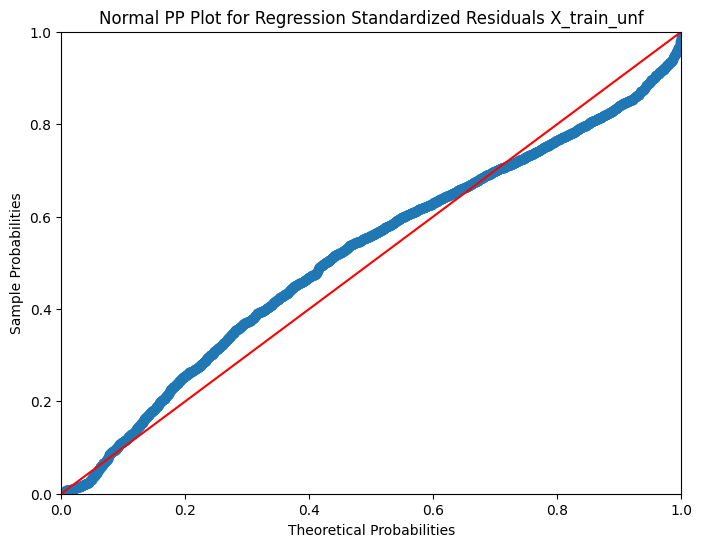

In [325]:
##visualize the residuals with ppplot
probplot_model4_xtrain_original = sm.ProbPlot(residt_model4_xtrain_original)
plt.figure(figsize=(5,4))
probplot_model4_xtrain_original.ppplot(line='45')
plt.title('Normal PP Plot for Regression Standardized Residuals X_train_unf')
plt.show()

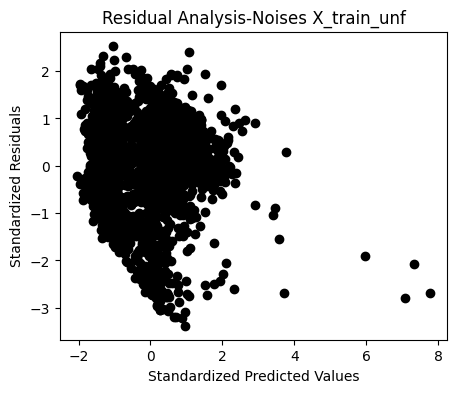

In [326]:
plt.figure(figsize=(5,4))
plt.scatter(get_standard_values(original_data_pred), get_standard_values(residt_model4_xtrain_original),color='black')
plt.title('Residual Analysis-Noises X_train_unf')
plt.xlabel('Standardized Predicted Values')
plt.ylabel('Standardized Residuals')
plt.show()

In [320]:
#manually selecting columns
cols_to_choose = ['nsites','density','density_atomic','energy_above_hull','is_stable','band_gap','efermi','is_metal',
                  'total_magnetization_normalized_vol','total_magnetization_normalized_formula_units','theoretical','Hexagonal',
                  'Hexagonal','Monoclinic','Orthorhombic','Tetragonal','Trigonal']
print(len(cols_to_choose))
X_train_manual = [col for col in cols_to_choose if col in X_scaled.columns]
X_train_manual = X_scaled[X_train_manual]
X_train_manual.shape

17


(2453, 17)

In [327]:
#model 5 building
model5 = LinearRegOLS(X_train_manual,y)

#forwardcalculation
model5.forward_calc(X_train_manual)

                                OLS Regression Results                               
Dep. Variable:     formation_energy_per_atom   R-squared:                       0.468
Model:                                   OLS   Adj. R-squared:                  0.465
Method:                        Least Squares   F-statistic:                     134.0
Date:                       Sat, 11 Oct 2025   Prob (F-statistic):          4.68e-319
Time:                               18:14:59   Log-Likelihood:                -3230.1
No. Observations:                       2453   AIC:                             6494.
Df Residuals:                           2436   BIC:                             6593.
Df Model:                                 16                                         
Covariance Type:                   nonrobust                                         
                                                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

In [328]:
##from this the best case is to use all the features

# SCIKIT LEARN LINEAR REGRESSION TO CONFIRM OLS RESULTS

In [345]:
##spltting scaled data
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.1,random_state=42)
x_train,x_val,y_train,y_val = train_test_split(x_train,y_train,test_size=0.1,random_state=42)

In [330]:
##employing scikit learn linear regression model
from sklearn.linear_model import LinearRegression

lr = LinearRegression(fit_intercept=True)

In [346]:
lr.fit(x_train,y_train)

LinearRegression()

In [347]:
coef = lr.coef_
coef.shape

(27,)

In [348]:
features = lr.feature_names_in_
features = list(features)

In [349]:
coef_map = pd.DataFrame({'features':features,'coefficients':coef})

In [350]:
coef_map

features  coefficients
0                                         nsites      0.253283
1                                         volume     -0.081081
2                                        density      0.238668
3                                 density_atomic      0.218925
4                              energy_above_hull      0.333522
5                                      is_stable     -0.032653
6                                       band_gap     -0.121881
7                                         efermi      0.185930
8                                  is_gap_direct      0.035525
9                                       is_metal      0.390984
10                                   is_magnetic      0.058002
11                           total_magnetization     -0.045693
12            total_magnetization_normalized_vol      0.044286
13  total_magnetization_normalized_formula_units     -0.078368
14                            num_magnetic_sites      0.048954
15                     num_unique_magnetic_sites     -0.015832
16                                   theoretical     -0.120802
17                                     Hexagonal      0.065085
18                                    Monoclinic     -0.095329
19                                  Orthorhombic     -0.069600
20                                    Tetragonal     -0.056075
21                                     Triclinic     -0.034240
22                                      Trigonal     -0.074403
23                                            FM     -0.250794
24                                           FiM     -0.016370
25                                            NM     -0.059475
26                                       Unknown      0.017898

In [337]:
lr.intercept_

np.float64(-1.538449868172329)

In [355]:
train_pred  = lr.predict(x_train)
train_pred

array([-0.99863394, -0.25967969, -2.7109839 , ..., -1.75167192,
       -1.88078826, -0.56429832])

In [368]:
##measuring model performance
print('mean abs error train data:',mean_absolute_error(y_train,train_pred))
print('mean sqr error train data:',mean_squared_error(y_train,train_pred))
print('r sqr error train data:',r2_score(y_train,train_pred))
print('error diff(1-err)=',1-r2_score(y_train,train_pred))

mean abs error train data: 0.6983985313087822
mean sqr error train data: 0.7906172839451622
r sqr error train data: 0.4820898906476543
error diff(1-err)= 0.5179101093523457


In [360]:
val_pred_lr = lr.predict(x_val)
val_pred_lr

array([-0.82186628, -2.17627488, -2.12047415, -2.19235367, -0.21694182,
       -2.52436799, -1.17442814, -1.59683359, -0.90775019, -1.1721283 ,
       -1.97649299, -1.01162716, -2.29181987, -0.95513199, -2.36575043,
       -2.26563625, -0.22912301, -2.41697168, -2.11589679, -1.64580751,
       -2.61727277, -0.74383532, -1.15263174, -2.60433714, -2.37659296,
       -2.57064125, -2.6954868 , -1.64144749, -1.12016386, -1.45957833,
       -2.26772634, -2.04029228,  0.22890264, -0.7535559 , -1.41665687,
       -1.67196066, -0.57255292, -2.51517348, -1.12506944, -0.95165273,
       -0.97938874, -1.74551717, -0.95467902, -0.99722308, -2.91074771,
       -1.41261033, -0.17841934, -1.46994655, -1.43782496, -2.04689877,
       -2.44038557, -2.15395671, -1.05344837, -1.85488744, -1.22764437,
       -2.6465733 , -2.20227063, -0.5863865 ,  0.15324651, -3.04256454,
       -2.58447022, -1.65259245, -0.9336097 , -1.56396507, -2.73551052,
       -1.42571566, -1.13406363, -0.70593872, -2.51667659, -0.90

In [369]:
print('mean abs error val data:',mean_absolute_error(y_val,val_pred_lr))
print('mean sqr error val data:',mean_squared_error(y_val,val_pred_lr))
print('r sqr error val data:',r2_score(y_val,val_pred_lr))
print('error diff(1-err)=',1-r2_score(y_val,val_pred_lr))

mean abs error val data: 0.692397501142531
mean sqr error val data: 0.7906029080406849
r sqr error val data: 0.4912610773800856
error diff(1-err)= 0.5087389226199144


In [366]:
##checking test dataset
test_pred_lr = lr.predict(x_test)
test_pred_lr

array([-9.06206182e-01, -1.32304686e+00, -2.24537318e+00, -1.79610276e+00,
       -8.22657246e-01, -1.22948895e+00, -2.61032888e+00, -1.30625872e+00,
       -2.25121261e+00, -3.23108399e-01, -9.33360465e-01, -5.06071935e-01,
       -1.24286463e+00, -1.29221938e+00, -2.11606371e+00, -1.58590043e+00,
       -2.40753495e+00, -1.40248222e+00, -2.75904831e+00, -6.60751773e-01,
       -1.29162890e+00, -2.78956735e+00, -2.35490074e+00, -8.92758006e-01,
       -2.87168764e+00, -1.52457992e+00, -1.37752645e+00,  8.58137205e-02,
       -1.76022619e+00, -2.76225072e+00, -9.94286808e-01, -1.53726984e+00,
       -9.39565948e-01, -2.32963942e+00, -2.06535772e+00, -5.95988607e-01,
       -6.04536491e-01, -2.27382561e+00, -1.05831547e+00, -1.40470770e+00,
       -2.31663060e+00, -1.83973898e+00, -1.80286967e+00, -8.66328186e-01,
       -1.49420835e+00, -2.93315263e+00, -2.70855291e+00, -2.62274509e+00,
       -1.21582241e+00, -2.30690668e+00, -9.14093189e-01, -1.39293938e+00,
       -1.73862308e+00, -

In [370]:
print('mean abs error val data:',mean_absolute_error(y_test,test_pred_lr))
print('mean sqr error val data:',mean_squared_error(y_test,test_pred_lr))
print('r sqr error val data:',r2_score(y_test,test_pred_lr))
print('error diff(1-err)=',1-r2_score(y_test,test_pred_lr))

mean abs error val data: 0.6925448811801516
mean sqr error val data: 0.7603869657933814
r sqr error val data: 0.5107092967632052
error diff(1-err)= 0.4892907032367948


<Figure size 500x400 with 0 Axes>

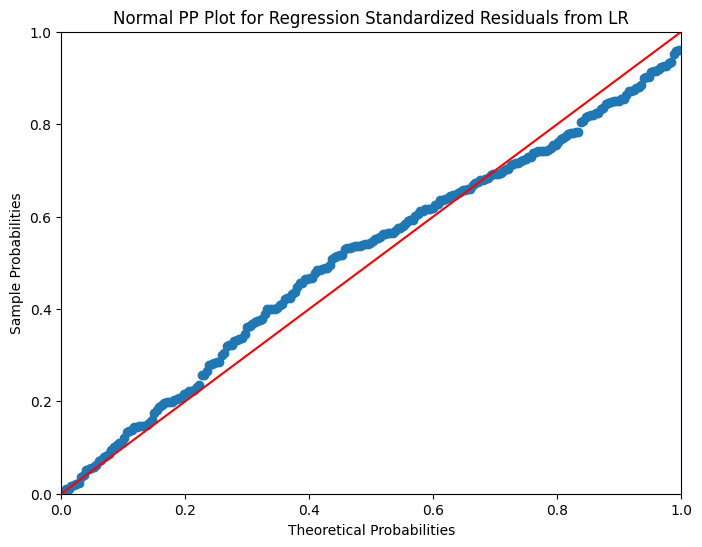

In [372]:
residuals = y_test-test_pred_lr

probplot_lr = sm.ProbPlot(residuals)
plt.figure(figsize=(5,4))
probplot_lr.ppplot(line='45')
plt.title('Normal PP Plot for Regression Standardized Residuals from LR')
plt.show()

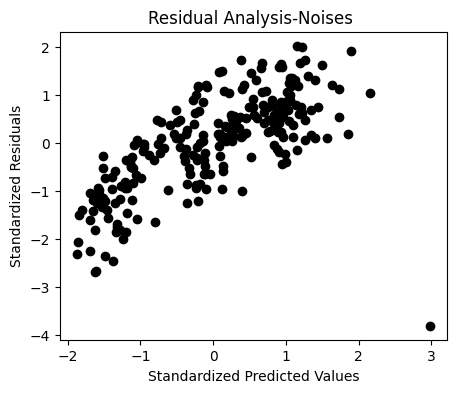

In [373]:
plt.figure(figsize=(5,4))
plt.scatter(get_standard_values(y_test), get_standard_values(residuals),color='black')
plt.title('Residual Analysis-Noises ')
plt.xlabel('Standardized Predicted Values')
plt.ylabel('Standardized Residuals')
plt.show()

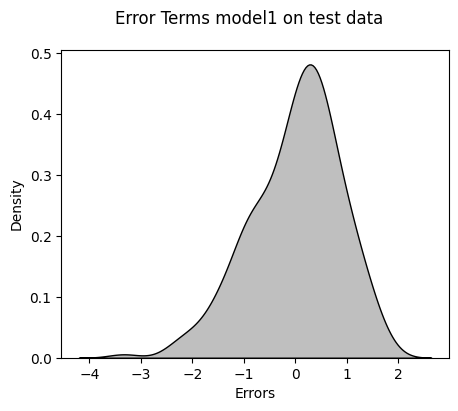

In [392]:
#check with kde plot
plt.figure(figsize=(5,4))
sns.kdeplot((y_test-test_pred_lr),color='black',fill=True)
plt.suptitle('Error Terms model1 on test data', fontsize=12)
plt.xlabel('Errors', fontsize=10)
plt.show()

In [374]:
#conclusion: OLS estimators through a series of feature extraction and selection failed to reduce errors in fewer features
#however adding all features from the scaled data improved the R-squared score slightly.
##this means that the increase in features dimension though may not work in all cases especially when PCA says a portion of the features contain all the information
##significantly improved the model which went contrary to PCA. the results were evaluated with regression metrics like the mae,mse,rmse and rsqaured, which were al poor.
##only a slight increase in model performance when model was built with all 27 features after feature engineering
##the use of scikit learn's linear model was to confirm the performance of the OLS estimation which underwent a series of rigorous refinement
##the ols estimator gave insight into what modern machine learning and deep learning algorithms failed to do-which is thw white box paradox.
##all in all both models barely reached a good rsquared score signifying their inability to capture the right patterns in the data

In [ ]:
##LINEAR REGRESSION MODELS FAIL TO CAPTURE NON-LINEARITY IN THE DATA
##SWITICHING TO NEURAL NETWORKS

# NEURAL NETWORK MODEL BUILDING-TRAINING AND TESTING

In [384]:
from sklearn.neural_network import MLPRegressor
from tqdm.auto import tqdm

#initialize
##hidden layers = 2
#units per layer = 25(1) and 50(2)
#activation=relu
#batch_size=16
#max_iter=200
#learning_rate=constant
#solver/optimizer=adam
regressor = MLPRegressor((25,50,),activation='relu',batch_size=16,max_iter=200,verbose=True,learning_rate='constant',
                         shuffle=True,momentum=0.9,solver='adam',)

In [377]:
##train data
x_train1 = regressor.fit(x_train,y_train)

Iteration 1, loss = 0.72393830
Iteration 2, loss = 0.39965202
Iteration 3, loss = 0.34748888
Iteration 4, loss = 0.30875058
Iteration 5, loss = 0.28800471
Iteration 6, loss = 0.27245269
Iteration 7, loss = 0.25835549
Iteration 8, loss = 0.24852729
Iteration 9, loss = 0.23811811
Iteration 10, loss = 0.22783338
Iteration 11, loss = 0.22527645
Iteration 12, loss = 0.21643317
Iteration 13, loss = 0.21203228
Iteration 14, loss = 0.20823580
Iteration 15, loss = 0.20202659
Iteration 16, loss = 0.19943390
Iteration 17, loss = 0.19182066
Iteration 18, loss = 0.19003773
Iteration 19, loss = 0.18652745
Iteration 20, loss = 0.18323074
Iteration 21, loss = 0.17717781
Iteration 22, loss = 0.17513989
Iteration 23, loss = 0.17029846
Iteration 24, loss = 0.17164374
Iteration 25, loss = 0.16350319
Iteration 26, loss = 0.16546123
Iteration 27, loss = 0.16684147
Iteration 28, loss = 0.16240174
Iteration 29, loss = 0.16106207
Iteration 30, loss = 0.15337344
Iteration 31, loss = 0.15259275
Iteration 32, los

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [380]:
print('best loss for mlp regressor fitting=',x_train1.best_loss_)

best loss for mlp regressor fitting= 0.0505792932848591


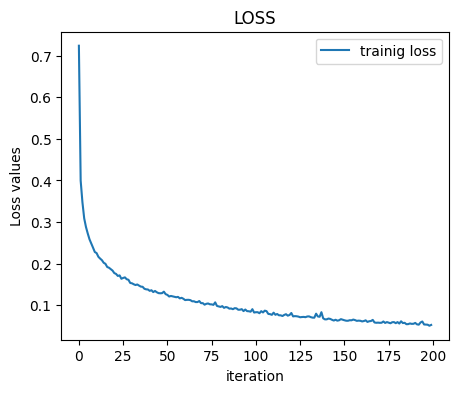

In [382]:
plt.figure(figsize=(5,4))
plt.plot(x_train1.loss_curve_,label='trainig loss')
plt.title('LOSS')
plt.xlabel('iteration')
plt.ylabel('Loss values')
plt.legend()
plt.show()

In [386]:
x_train_pred = x_train1.predict(x_train)
x_train_pred

array([-0.31137939, -0.56247778, -2.15697393, ..., -1.67164799,
       -1.69041571, -0.65529918])

In [388]:
print('mean abs error neural net1 train data :',mean_absolute_error(y_train,x_train_pred))
print('mean sqr error neural net1 train data:',mean_squared_error(y_train,x_train_pred))
print('r sqr error neural net1 train data:',r2_score(y_train,x_train_pred))
print('error1 (1-rsqr)=',1-r2_score(y_train,x_train_pred))

mean abs error neural net1 train data : 0.22692307198429565
mean sqr error neural net1 train data: 0.09651623844240985
r sqr error neural net1 train data: 0.9367750533399006
error1 (1-rsqr)= 0.06322494666009937


In [390]:
val_pred = x_train1.predict(x_val)
print('mean abs error val data neural net1:',mean_absolute_error(y_val,val_pred))
print('mean sqr error val data neural net1:',mean_squared_error(y_val,val_pred))
print('r sqr error:',r2_score(y_val,val_pred))
print('error1 (1-rsqr)=',1-r2_score(y_val,val_pred))

mean abs error val data neural net1: 0.4858635298468687
mean sqr error val data neural net1: 0.5453546382960279
r sqr error: 0.6490739809949991
error1 (1-rsqr)= 0.35092601900500087


In [391]:
###shows signs of overfitting
##the model above with 2 layers and 25,50 neurons in respective layers shows signs of overfitting

/tmp/ipython-input-2406486946.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_val-val_pred),color='black')


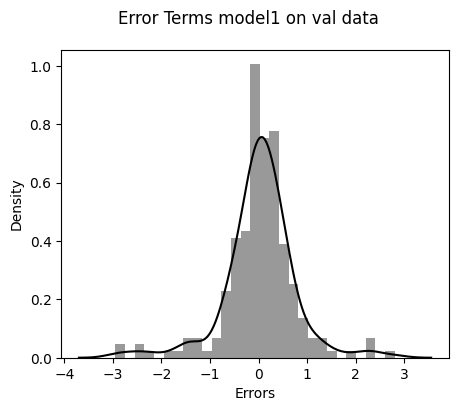

In [403]:
##visualize performance
#check with kde plot
plt.figure(figsize=(5,4))
sns.distplot((y_val-val_pred),color='black')
plt.suptitle('Error Terms model1 on val data', fontsize=12)
plt.xlabel('Errors', fontsize=10)
plt.show()

<Figure size 500x400 with 0 Axes>

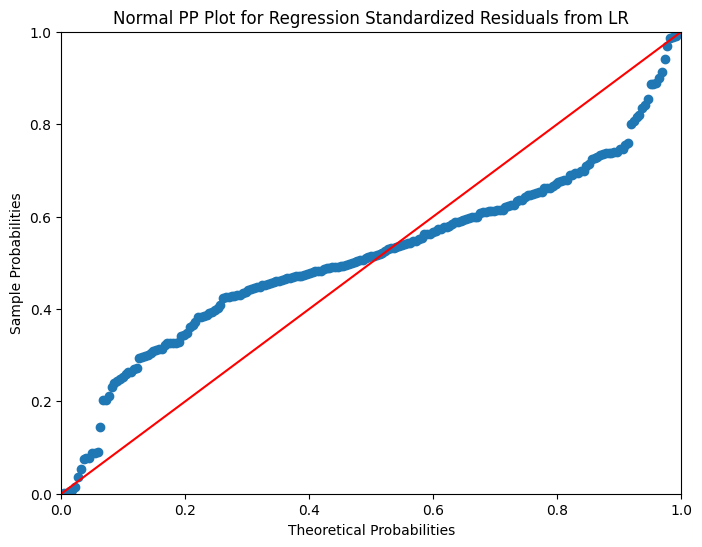

In [396]:
#residual plot
residuals = y_val-val_pred

probplot_lr = sm.ProbPlot(residuals)
plt.figure(figsize=(5,4))
probplot_lr.ppplot(line='45')
plt.title('Normal PP Plot for Regression Standardized Residuals from LR')
plt.show()

In [404]:
##the pp plot shows that the distribution of the residuals is not normally distributed

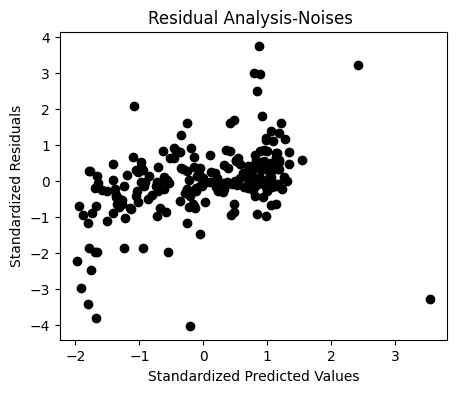

In [397]:
plt.figure(figsize=(5,4))
plt.scatter(get_standard_values(y_val), get_standard_values(residuals),color='black')
plt.title('Residual Analysis-Noises ')
plt.xlabel('Standardized Predicted Values')
plt.ylabel('Standardized Residuals')
plt.show()

In [414]:
##reducing model complexity
#layers 2
##layer 1=10 neurons
##layer 2=25 neurons
reg_model2 = MLPRegressor((10,25,),activation='relu',batch_size=16,max_iter=400,verbose=False,learning_rate='constant',
                         shuffle=True,momentum=0.9,solver='adam',validation_fraction=0.1,early_stopping=False)

In [415]:
reg_model2.fit(x_train,y_train)

MLPRegressor(batch_size=16, hidden_layer_sizes=(10, 25), max_iter=400)

In [416]:
x_train_pred = reg_model2.predict(x_train)
x_train_pred

array([-0.66434133, -0.59317371, -2.09326892, ..., -1.85213857,
       -1.60015271, -0.79015759])

In [417]:
print('mean abs error neural net1 train data :',mean_absolute_error(y_train,x_train_pred))
print('mean sqr error neural net1 train data:',mean_squared_error(y_train,x_train_pred))
print('r sqr error neural net1 train data:',r2_score(y_train,x_train_pred))
print('error1 (1-rsqr)=',1-r2_score(y_train,x_train_pred))

mean abs error neural net1 train data : 0.3486422881189381
mean sqr error neural net1 train data: 0.2327067645386132
r sqr error neural net1 train data: 0.8475606487277564
error1 (1-rsqr)= 0.15243935127224362


In [412]:
##model2's adj rsquared dropped after reducing model complexity

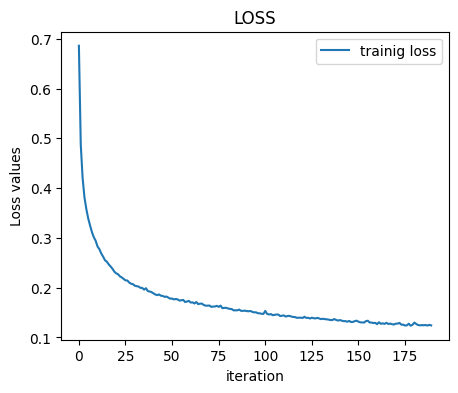

In [418]:
plt.figure(figsize=(5,4))
plt.plot(reg_model2.loss_curve_,label='trainig loss')
plt.title('LOSS')
plt.xlabel('iteration')
plt.ylabel('Loss values')
plt.legend()
plt.show()

In [419]:
val_pred = reg_model2.predict(x_val)
print('mean abs error val data neural net1:',mean_absolute_error(y_val,val_pred))
print('mean sqr error val data neural net1:',mean_squared_error(y_val,val_pred))
print('r sqr error:',r2_score(y_val,val_pred))
print('error1 (1-rsqr)=',1-r2_score(y_val,val_pred))

mean abs error val data neural net1: 0.48758242151561254
mean sqr error val data neural net1: 0.4874257989731453
r sqr error: 0.6863501597264703
error1 (1-rsqr)= 0.3136498402735297


/tmp/ipython-input-2406486946.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_val-val_pred),color='black')


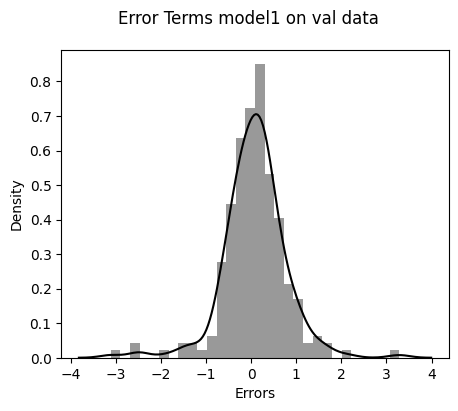

In [420]:
##visualize performance
#check with kde plot
plt.figure(figsize=(5,4))
sns.distplot((y_val-val_pred),color='black')
plt.suptitle('Error Terms model1 on val data', fontsize=12)
plt.xlabel('Errors', fontsize=10)
plt.show()

In [ ]:
##increasing max_iter to 500
regressor = MLPRegressor((25,50,),activation='relu',batch_size=16,max_iter=500,verbose=False,learning_rate='constant',
                         shuffle=True,momentum=0.9,solver='adam',validation_fraction=0.1)

In [ ]:
X_train2 = regressor.fit(X_train,y_train)

In [ ]:
X_train2.validation_scores_

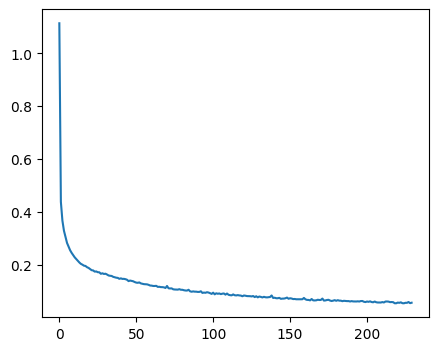

In [ ]:
plt.figure(figsize=(5,4))
plt.plot(X_train2.loss_curve_)

In [ ]:
x2_train_pred = regressor.predict(X_train)

In [ ]:
##checking performance
print('mean abs error:',mean_absolute_error(x2_train_pred,y_train))
print('mean sqr error:',mean_squared_error(x2_train_pred,y_train))
print('r sqr error:',r2_score(x2_train_pred,y_train))

mean abs error: 0.22547316185355218
mean sqr error: 0.09606534921055433
r sqr error: 0.9321357785882598


In [ ]:
x2_test_pred = X_train2.predict(X_test)
print('mean abs error:',mean_absolute_error(x2_test_pred,y_test))
print('mean sqr error:',mean_squared_error(x2_test_pred,y_test))
print('r sqr error:',r2_score(x2_test_pred,y_test))

mean abs error: 0.4882624148426478
mean sqr error: 0.4454123737632045
r sqr error: 0.6751506790359805


In [ ]:
##increasing model complexity through increase in depth and width
regressor=MLPRegressor((25,50,100,),activation='relu',batch_size=16,max_iter=500,verbose=False,learning_rate='constant',
                         shuffle=True,momentum=0.9,solver='adam',validation_fraction=0.1)

In [ ]:
x3_train = regressor.fit(X_train,y_train)

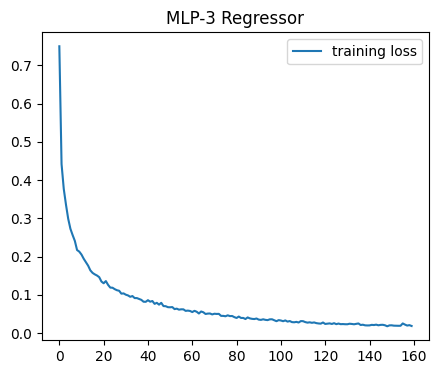

In [ ]:
plt.figure(figsize=(5,4))
plt.plot(x3_train.loss_curve_,label='training loss')
plt.legend()
plt.title('MLP-3 Regressor');

In [ ]:
x3_train_pred = regressor.predict(X_train)

In [ ]:
##checking performance
print('mean abs error:',mean_absolute_error(x3_train_pred,y_train))
print('mean sqr error:',mean_squared_error(x3_train_pred,y_train))
print('r sqr error:',r2_score(x3_train_pred,y_train))

mean abs error: 0.13428189712873892
mean sqr error: 0.03372922529856571
r sqr error: 0.975906065942493


In [ ]:
##testing
x3_test_pred = x3_train.predict(X_test)
print('mean abs error:',mean_absolute_error(x3_test_pred,y_test))
print('mean sqr error:',mean_squared_error(x3_test_pred,y_test))
print('r sqr error:',r2_score(x3_test_pred,y_test))

mean abs error: 0.4609738207270413
mean sqr error: 0.41237804554531915
r sqr error: 0.6842682783568808


In [ ]:
print('mean abs error:',mean_absolute_error(x3_test_pred,y_test))
print('mean sqr error:',mean_squared_error(x3_test_pred,y_test))
print('r sqr error:',r2_score(x3_test_pred,y_test))

Text(0.5, 0, 'Errors')

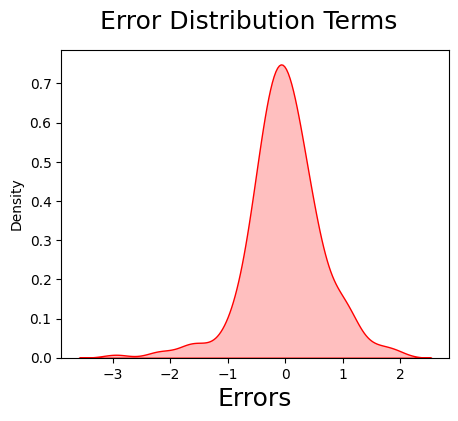

In [ ]:
plt.figure(figsize=(5,4))
sns.kdeplot((y_test-x3_test_pred),color='red',fill=True)
plt.suptitle('Error Distribution Terms', fontsize=18)
plt.xlabel('Errors', fontsize=18)

Text(0, 0.5, 'y_pred')

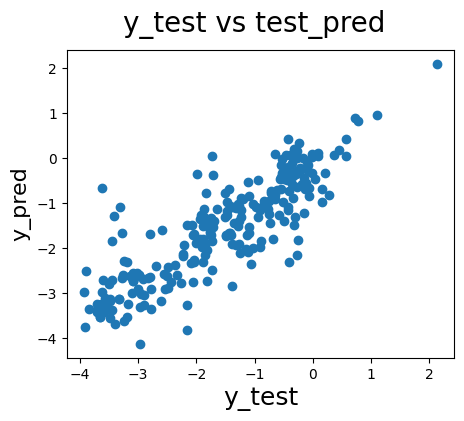

In [ ]:
plt.figure(figsize=(5,4))
plt.scatter(y_test, x3_test_pred)
plt.suptitle('y_test vs test_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)

In [ ]:
##applying cross-validation
from sklearn.model_selection import GridSearchCV,cross_val_score

In [ ]:
##since the neural network fits the data well, i will create a manual grid search that will select the best model hyperparameters for the data


In [ ]:
MLPRegressor()

Object `MLPRegressor` not found.


In [ ]:
epochs = [200,300,400,500]
units_in_layers = [(25,50),(50,100,),(75,150,200,)]
activations = ['relu','tanh']
solvers = ['sgd','adam','rmsprop']
for a in range(len(activations)):
    for s in range(len(solvers)):
        for e in range(len(epochs)):
            for u in range(len(units_in_layers)):
                solver = solvers[s]
                activation = activations[a]
                units = units_in_layers[u]
                epoch = epochs[e]
                model = MLPRegressor(hidden_layer_sizes=units,activation=activation,solver=solver,batch_size=32,momentum=0.9,
                                     verbose=True,).fit(X_train)